<a href="https://colab.research.google.com/github/seyeonjungGit/P_Project_YOUTUBE_Analysis/blob/main/Youtube_Analysis(Q1_(1)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치 & 기본설정

matplotlib 폰트 설치
- 설치 후 런타임 재시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 설정 변환을 위해서 matplotlib만 import
import matplotlib as mpl
import warnings

# Windows
mpl.rc("font", family='NanumBarunGothic')

# 폰트변경 후 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

# 화질설정
%config InlineBackend.figure_format='retina'

warnings.filterwarnings("ignore")
%matplotlib inline

프로파일링 설치

In [ ]:
# pip install -U pandas-profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df_origin = pd.read_csv('/content/drive/MyDrive/preon_nlp/기업과제자료/pretest_data.csv')
df_origin.head(3)

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341


In [ ]:
df_origin.shape

(2644, 25)

In [ ]:
df_origin.duplicated().sum()

0

중복데이터는 없음

In [ ]:
df_origin.isnull().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

결측치는 tags와 description에 분포

- tags                        370
- description                  40

In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   video_id                  2644 non-null   object
 1   channel_id                2644 non-null   object
 2   published_date            2644 non-null   object
 3   category_name             2644 non-null   object
 4   duration                  2644 non-null   object
 5   tags                      2274 non-null   object
 6   description               2604 non-null   object
 7   on_trending_date          2644 non-null   object
 8   off_trending_date         2644 non-null   object
 9   on_rank                   2644 non-null   int64 
 10  off_rank                  2644 non-null   int64 
 11  on_views                  2644 non-null   int64 
 12  off_views                 2644 non-null   int64 
 13  on_likes                  2644 non-null   int64 
 14  off_likes               

2644row와 25columns, object와 int 형이 있음.

## 판다스 프로파일링

In [ ]:
# from pandas_profiling import ProfileReport
# profile=df.profile_report() 
# profile.to_file('./Youtube_report1.html') 

## 전처리(형변환)

In [ ]:
df_origin.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
import copy

# 원본 보존(dataframe은 mutable한 객체이므로 복제를 위해 deepcopy(깊은복사) 이용)
df = copy.deepcopy(df_origin)

In [ ]:
from datetime import date

# 이후 편의를 위해 날짜형 데이터로 형변환
df['published_date'] = pd.to_datetime(df['published_date'])
df['on_trending_date'] = pd.to_datetime(df['on_trending_date'])
df['off_trending_date'] = pd.to_datetime(df['off_trending_date'])

In [ ]:
# 형변환 확인
df.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

## summary statistics

In [ ]:
# Numeric data에 대한 통계 확인 (datetime형 포함)
df.describe(datetime_is_numeric=True)

,published_date,on_trending_date,off_trending_date,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2644,2644,2644,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2.644000e+03,2644.000000,2644.000000
mean,2021-05-27 14:13:58.729198336,2021-05-29 15:45:28.593040896,2021-05-30 23:40:23.600605184,20.234493,35.795386,9.534819e+05,1.432732e+06,5.465813e+04,6.845384e+04,534.279879,860.402421,9.032085e+03,1.111202e+04,1.742059e+06,1.748095e+06,8.639525e+08,8.665469e+08,9276.285174,9229.746596
min,2021-03-25 00:00:00,2021-03-27 00:00:00,2021-04-01 00:00:00,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.531600e+04,5.531600e+04,1.000000,1.000000
25%,2021-04-27 00:00:00,2021-04-29 00:00:00,2021-04-30 00:00:00,9.000000,28.000000,2.353520e+05,3.068540e+05,4.208500e+03,4.932750e+03,86.000000,108.000000,5.110000e+02,5.977500e+02,1.480000e+05,1.507500e+05,3.698228e+07,3.780661e+07,118.000000,118.000000
50%,2021-05-28 00:00:00,2021-05-30 00:00:00,2021-05-31 00:00:00,19.000000,37.000000,4.279245e+05,5.715080e+05,7.851000e+03,9.507000e+03,159.000000,211.000000,1.157000e+03,1.311500e+03,4.670000e+05,4.695000e+05,1.215355e+08,1.223838e+08,326.500000,327.500000
75%,2021-06-27 00:00:00,2021-06-29 00:00:00,2021-07-01 00:00:00,30.000000,45.000000,8.268800e+05,1.119499e+06,1.688350e+04,2.085950e+04,315.000000,435.000000,2.720000e+03,3.150750e+03,1.272500e+06,1.282500e+06,4.857386e+08,4.878799e+08,1245.250000,1244.500000
max,2021-07-29 00:00:00,2021-07-31 00:00:00,2021-07-31 00:00:00,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000
std,NaN,NaN,NaN,12.833115,10.376753,3.200375e+06,6.836354e+06,3.239337e+05,4.983217e+05,2070.643487,4754.238395,1.155321e+05,1.574601e+05,5.546694e+06,5.569829e+06,2.511740e+09,2.518026e+09,43156.370481,43100.803783


3월월 말부터 7월말까지의 데이터이며,

1위부터 50위까지의 인기동영상 데이터입니다.

In [ ]:
# categorical data에 대한 통계 -> 관측값 개수와 유일값개수, 최빈값, 최빈값의 빈도수.
df.describe(include=[object])  

,video_id,channel_id,category_name,duration,tags,description
count,2644,2644,2644,2644,2274,2604
unique,2643,940,15,1200,1978,2492
top,VBSBm,CHQ2O-i,Entertainment,PT8M1S,파뿌리|예능|게임|GAME|오락|버라이어티|variety|웹예능|플레이,Connect with BTS: https://ibighit.com/bts http...
freq,2,17,954,17,14,10


# Q1.데이터 타입별 시각화
    ◦ 전체기간 카테고리->채널->비디오 개수
    ◦ 월별 카테고리->채널->비디오 개수
    ◦ 월별 TOP10 채널 (분류 기준은 비디오 개수)
    ◦ 주별 TOP5 채널 (분류 기준은 비디오 개수)
    ◦ 월별 카테고리별 태그 키워드 순위

## 1) 전체기간 카테고리->채널->비디오 개수

<(과제에서 요구하는 바는 아님. 경향성을 알아보기 위한 것) 인기비디오로 채택된 채널들의 카테고리별 채택된 비디오 개수>

먼저 어떤 카테고리에서 비디오가 많이 제작되는지 살펴보겠습니다.

In [ ]:
# 카테고리별 유일값 개수세기. 

category_count = df['category_name'].value_counts(ascending=True).reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})
category_count

,categoty_name,count
0,Nonprofits & Activism,1
1,Travel & Events,23
2,Autos & Vehicles,31
3,Science & Technology,36
4,Education,65
5,Pets & Animals,65
6,Film & Animation,74
7,Gaming,80
8,Howto & Style,119
9,News & Politics,162


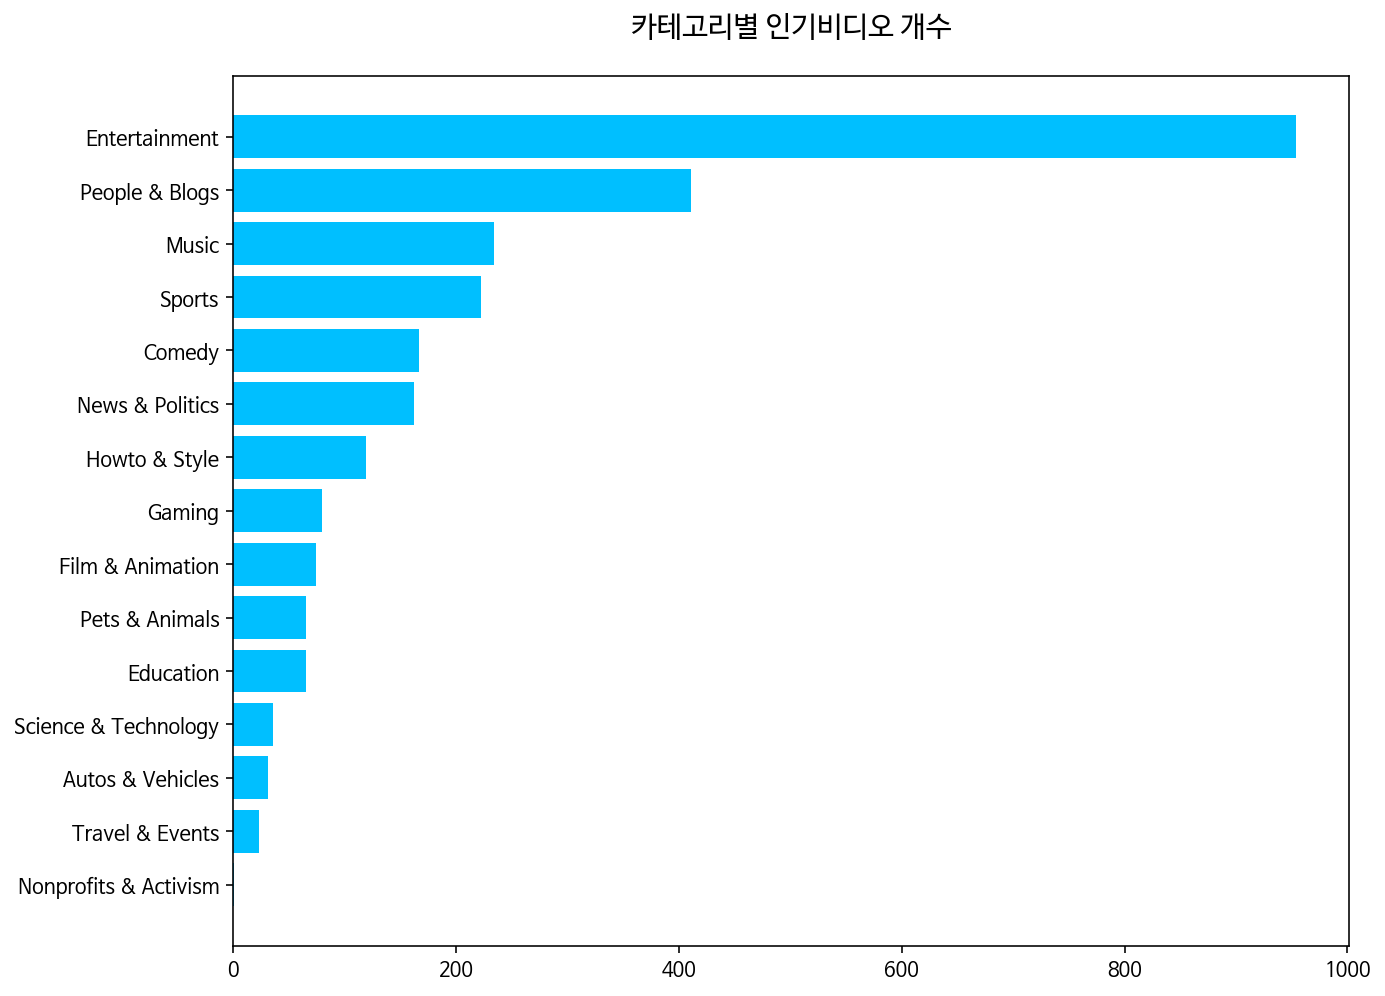

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))
plt.title("카테고리별 인기비디오 개수", pad=20,fontsize ='x-large');


y = np.arange(len(category_count))
plt.barh(y, category_count['count'], color = 'deepskyblue')
plt.yticks(y, category_count['categoty_name'])
plt.show()

Entertainment가 압도적으로 비디오가 많이 제작되는 카테고리임을 알 수 있습니다.

< 이후 생각할 수 있는 것 >

- 카테고리와 인게이지먼트의 상관관계를 알아볼 것!

    - 많이 제작되는 카테고리가 사람들 반응이 좋아서 그런것인가?아니면 다른 이유(쉽게접근가능 등)가 있는 것인가

    - (가설 : 많은 비디오가 제작되는 카테고리는 사람들에게 호응도가 높을 것이다.)

In [ ]:
category_count = df['category_name'].value_counts().reset_index()\
    .rename(columns = {'index':'categoty_name', 'category_name':'count'})

In [ ]:
category = category_count['categoty_name'].tolist()
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

In [ ]:
len(category)

15

카테고리 개수는 총 15개입니다.

In [ ]:
# 이후에 category list를 활용해 변수로 쓰기 위함.
category_df = category.copy()

In [ ]:
category_df

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

In [ ]:
df.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
df['channel_id'].duplicated().sum()

1704

In [ ]:
# 비디오 개수를 세기 위한 컬럼을 'video_id'로 선정
# 중복값이 있음.
df['video_id'].duplicated().sum()

1

In [ ]:
df[df['video_id']=='VBSBm']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
534,VBSBm,CH0VR2v,2021-05-07,Entertainment,PT11M6S,요리|레시피|육식|고기|육식맨|고기요리|YOOXICMAN|짜장면|자장면|짜장|고기짜...,"※ 오늘 영상에 등장하는 모든 식재료, 조리도구, 업장, TV프로그램, 브랜드, 서...",2021-05-09,2021-05-10,40,...,156,187,1458,1568,652000,652000,94094934,94383615,90,90
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,625,765,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456


채택비디오 개수를 세기 위해 video_id 컬럼을 선정하였으나, 중복값이 있습니다.

그러나 채널 아이디가 다르므로 상관은 없습니다.

In [ ]:
# 채널별 비디오 개수.
df['video_id'].groupby(df['channel_id']).count().sort_values()\
    .reset_index().rename(columns={'video_id':'video_count'})

,channel_id,video_count
0,CHWqWR1,1
1,CHffY-g,1
2,CHJpGg1,1
3,CHfnMSb,1
4,CHJko7d,1
...,...,...
935,CHiwQRG,14
936,CHlzB2i,14
937,CHmzMtX,14
938,CHtybqq,15


카테고리에 상관없이 채널별로 인기비디오에 채택된 영상 개수가 몇 개인지 세어보았습니다.

분석할 수 있는 채널의 개수는 총 940개이며, 각 채널은 최소 1개부터 최대 17개까지 인기비디오로 채택된 비디오를 보유하고 있습니다.

Enterainment 카테고리에 속한 인기비디오가 가장 많았기 때문에, 

먼저 Entertainment 카테고리에서 인기비디오로 선정된 채널의 Enterainment 채택비디오 개수를 세아려 보겠습니다.

In [ ]:
df[df['category_name'] == category[0]]['video_id']

0       V-0db
1       V-1XL
2       V-4fa
7       V-A3g
8       V-BJt
        ...  
2620    VzLZ7
2625    VzPmJ
2627    VzU5s
2635    VzpLm
2642    Vzz6W
Name: video_id, Length: 954, dtype: object

In [ ]:
# Categoty = Entertainment 에서, 채널별 채택된 비디오 개수.
df[df['category_name'] == category[0]]['video_id'].groupby(df['channel_id']).count().sort_values()\
    .reset_index().rename(columns={'video_id':'video_count'})

,channel_id,video_count
0,CHzt24f,1
1,CHchRZl,1
2,CHIuteB,1
3,CHclwLh,1
4,CHIn1p2,1
...,...,...
307,CHUyfkq,10
308,CHaKod3,11
309,CHiwQRG,14
310,CHlzB2i,14


In [ ]:
for i in range(len(category)):
    category_df[i] = \
        df[df['category_name'] == category[i]]['video_id'].groupby(df['channel_id']).count().sort_values()\
    .reset_index().rename(columns={'video_id':'video_count'})

In [ ]:
print(f'"{category[0]}"에 해당하는 채널별 비디오 개수 정렬')
category_df[0]

"Entertainment"에 해당하는 채널별 비디오 개수 정렬


,channel_id,video_count
0,CHzt24f,1
1,CHchRZl,1
2,CHIuteB,1
3,CHclwLh,1
4,CHIn1p2,1
...,...,...
307,CHUyfkq,10
308,CHaKod3,11
309,CHiwQRG,14
310,CHlzB2i,14


"Entertainment"에 해당하는 채널별 선정비디오 개수 유일값을 계산해봅시다.

즉, "Entertainment" 카테고리에서 인기비디오로 채택된 채널들의 Entertainment 비디오 인기영상 선정 경향성을 살펴봅니다.

In [ ]:
category_df[0]['video_count'].value_counts().reset_index().rename(columns = {'index' : 'video_count', 'video_count':'count'})

,video_count,count
0,1,112
1,2,58
2,3,44
3,4,28
4,5,23
5,6,14
6,7,13
7,8,10
8,9,4
9,10,2



3월말부터 7월말까지 상위 50위를 기록한 인기동영상 중에서, Entertainment 영상에 선정된 채널은 312개이며, 

그 중 112개의 채널이 Entertainment영상에 단 1개 선정되었습니다. 

채널들 중 상당수가 Entertainment 카테고리에 대해 1~5개 정도 적은 개수로 채택된 것을 알 수 있습니다.

즉, 해당 카테고리에 대한 영상을 많이 제작한다고 해서 모두 해당 카테고리에 인기동영상으로 선정되지는 않고, 
최대한 여러 사람의 관련컨텐츠가 나오게 됩니다. (즉, 1사람에게 몰아서 entertainment인기영상으로 선정해주지 않는 경우가 많습니다.)

- Entertainment 카테고리에서 가장 많은 Entertainment관련영상이 채택된 CHQ2O-i 는 어떤 영상을 제작했을까요? 

이후 분석해 볼 수 있는 문제입니다.

In [ ]:
df[df['channel_id']=='CHQ2O-i']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
369,V7gJ8,CHQ2O-i,2021-05-14,Entertainment,PT16M25S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #고깔고깔 콜라보에 응해주신 달려라 방탄 제작진 여러분들...,2021-05-16,2021-05-16,27,...,596,596,7050,7050,3190000,3190000,499865271,499865271,344,344
618,VDEuV,CHQ2O-i,2021-05-07,Entertainment,PT21M58S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #미션공개💜5/4(화) 밤 9시출장십오야 x 달려라방탄 1...,2021-05-09,2021-05-10,22,...,965,1507,6944,7961,3020000,3050000,473058810,480296798,334,334
675,VEldQ,CHQ2O-i,2021-04-27,Entertainment,PT44S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#출장십오야 #달려라방탄 #티저투부르면, 달려 갑니다! 세계최초(?) 예능배달서비스...",2021-04-29,2021-04-29,34,...,167,167,3708,3708,2710000,2710000,446596056,446596056,320,320
892,VJbtQ,CHQ2O-i,2021-05-07,Entertainment,PT22M11S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#출장십오야 #달려라방탄 #자네지금뭐하는건가💜5/4(화) 밤 9시출장십오야 x 달려...,2021-05-09,2021-05-11,5,...,1144,1755,6296,7628,3020000,3070000,473058810,484415766,334,334
906,VJpRv,CHQ2O-i,2021-07-02,Entertainment,PT14M29S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#송민호의파일럿 #그림1 #유료광고포함인물퀴즈 사진 제공 : 연합뉴스네 가지 아이템...,2021-07-06,2021-07-07,12,...,186,200,1449,1525,3420000,3420000,599368913,600796564,412,417
980,VLfsx,CHQ2O-i,2021-06-04,Entertainment,PT21M33S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#지금까지감사했습니다 #출장가기좋은계절에돌아오겠습니다 #출장십오야부르면, 달려 갑니...",2021-06-06,2021-06-07,24,...,122,160,1847,2399,3320000,3330000,547569813,550297960,364,364
1001,VML9E,CHQ2O-i,2021-05-02,Entertainment,PT26M27S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#유료광고포함 #빈센조 #스페셜 부르면, 달려 갑니다!세계최초(?) 예능배달서비스 ...",2021-05-03,2021-05-07,2,...,281,571,2423,3927,2770000,2830000,454412205,464822645,328,330
1030,VMwA0,CHQ2O-i,2021-05-02,Entertainment,PT18M53S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#빈센조 #스페셜 #고요속의외침부르면, 달려 갑니다!세계최초(?) 예능배달서비스 출...",2021-05-03,2021-05-06,3,...,183,394,1976,3425,2770000,2820000,454412205,463120809,328,329
1192,VRMiX,CHQ2O-i,2021-05-21,Entertainment,PT19M3S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,"#게임시작했다 #게임끝났다 #스피드게임아님부르면, 달려 갑니다! 세계최초(?) 예능...",2021-05-23,2021-05-23,33,...,141,141,1598,1598,3240000,3240000,520784289,520784289,349,349
1371,VW73A,CHQ2O-i,2021-07-02,Entertainment,PT14M30S,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...,#송민호의파일럿 #그림2 #작품임수정인물퀴즈 사진 제공 : 연합뉴스네 가지 아이템 ...,2021-07-07,2021-07-07,31,...,149,149,1954,1954,3420000,3420000,600796564,600796564,417,417


Entertainment 카테고리 외 모든 카테고리에 대해 인기영상 선정 경향성을 살펴보겠습니다. 각 채널들에서 특정 카테고리에 대해 인기영상으로 선정된 개수의 경향성은 어떻게 될까요?


In [ ]:
# 출력은 영상이 많이 제작되는 카테고리 순으로 되어있음.

for i in range(len(category)):
    print(category[i])
    print(category_df[i]['video_count'].value_counts().reset_index().rename(columns = {'index' : 'video_count', 'video_count':'count'}))
    print()

Entertainment
    video_count  count
0             1    112
1             2     58
2             3     44
3             4     28
4             5     23
5             6     14
6             7     13
7             8     10
8             9      4
9            10      2
10           14      2
11           11      1
12           17      1

People & Blogs
    video_count  count
0             1     79
1             2     32
2             4     21
3             3     19
4             8      4
5            10      3
6             5      2
7             6      2
8             7      1
9             9      1
10           13      1
11           14      1

Music
    video_count  count
0             1     58
1             2     13
2             3     11
3             8      5
4             5      3
5             6      3
6             4      1
7             7      1
8             9      1
9            11      1
10           13      1

Sports
    video_count  count
0             1     28
1           

모든 카테고리에 대한 공통점은 ,

한 카테고리의 인기비디오로 선정된 채널이 그 카테고리에 대해 1개의 영상만 채택된 경우가 압도적으로 많다는 것입니다.

히스토그램으로 빈도수를 표현해 보겠습니다.

먼저 Entertainment 카테고리에서 채널별 인기영상 선정 경향성을 보겠습니다.

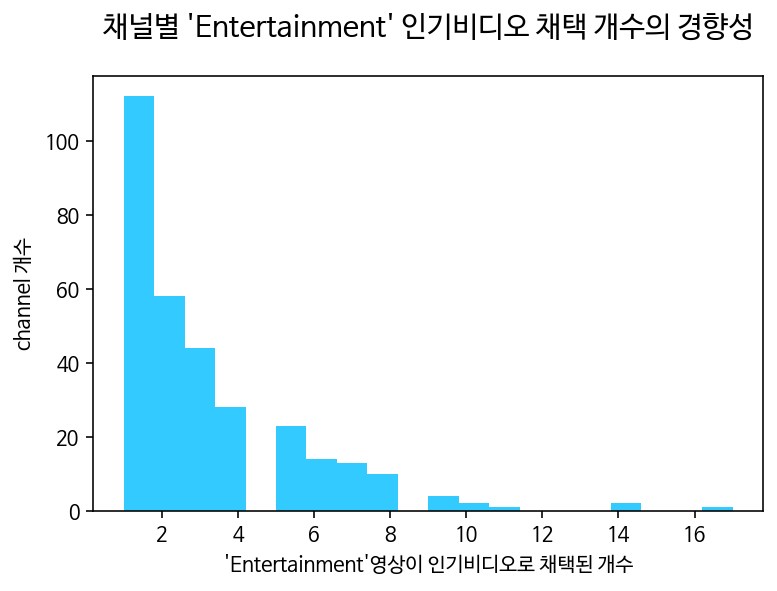

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(category_df[0]['video_count'], bins=20,  color = 'deepskyblue', alpha = 0.8)
plt.xlabel(f"'{category[0]}'영상이 인기비디오로 채택된 개수");
plt.ylabel('channel 개수');
plt.title(f"채널별 '{category[0]}' 인기비디오 채택 개수의 경향성", pad=20,fontsize ='x-large');
# plt.grid(True)
plt.show();

전체 카테고리에 대해 경향성을 살펴보겠습니다.

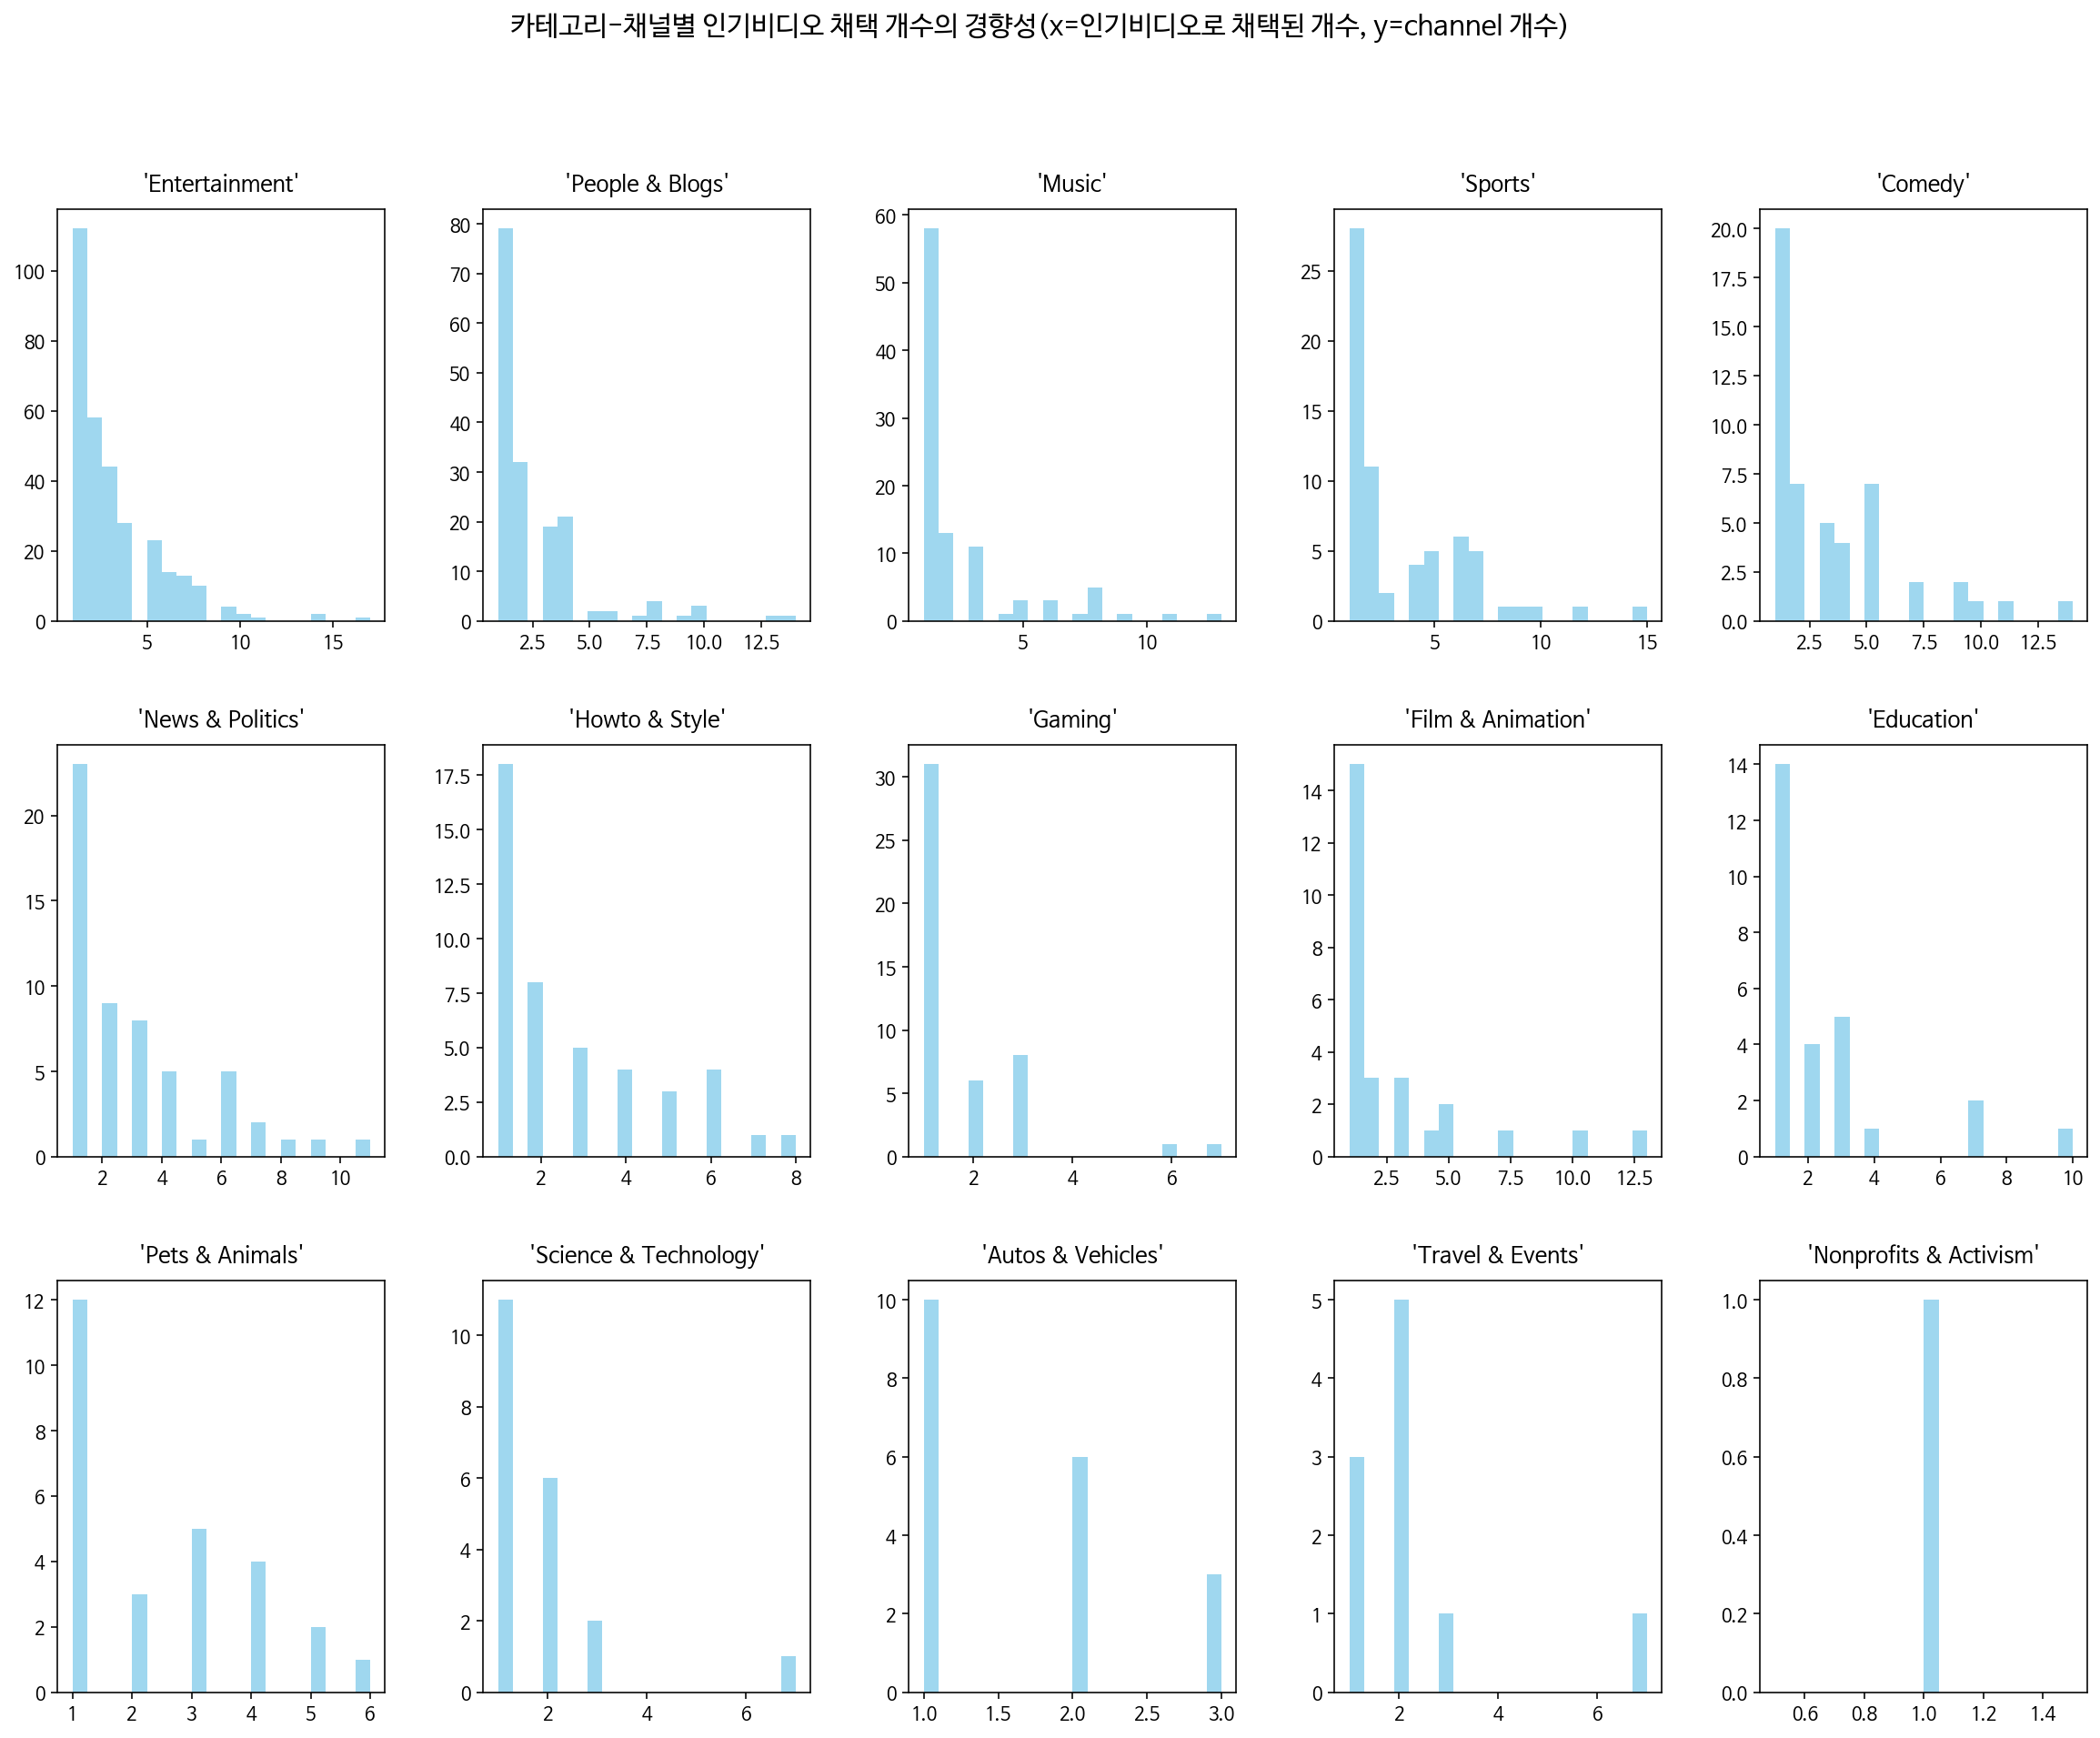

In [ ]:
# subplot 개수 설정
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((20, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# figure 전체 제목
f.suptitle('카테고리-채널별 인기비디오 채택 개수의 경향성(x=인기비디오로 채택된 개수, y=channel 개수)', fontsize = 15)

i=0
for j in range(3):
    for k in range(5):
        axes[j, k].hist(category_df[i]['video_count'],bins=20, color = 'skyblue', alpha = 0.8)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()

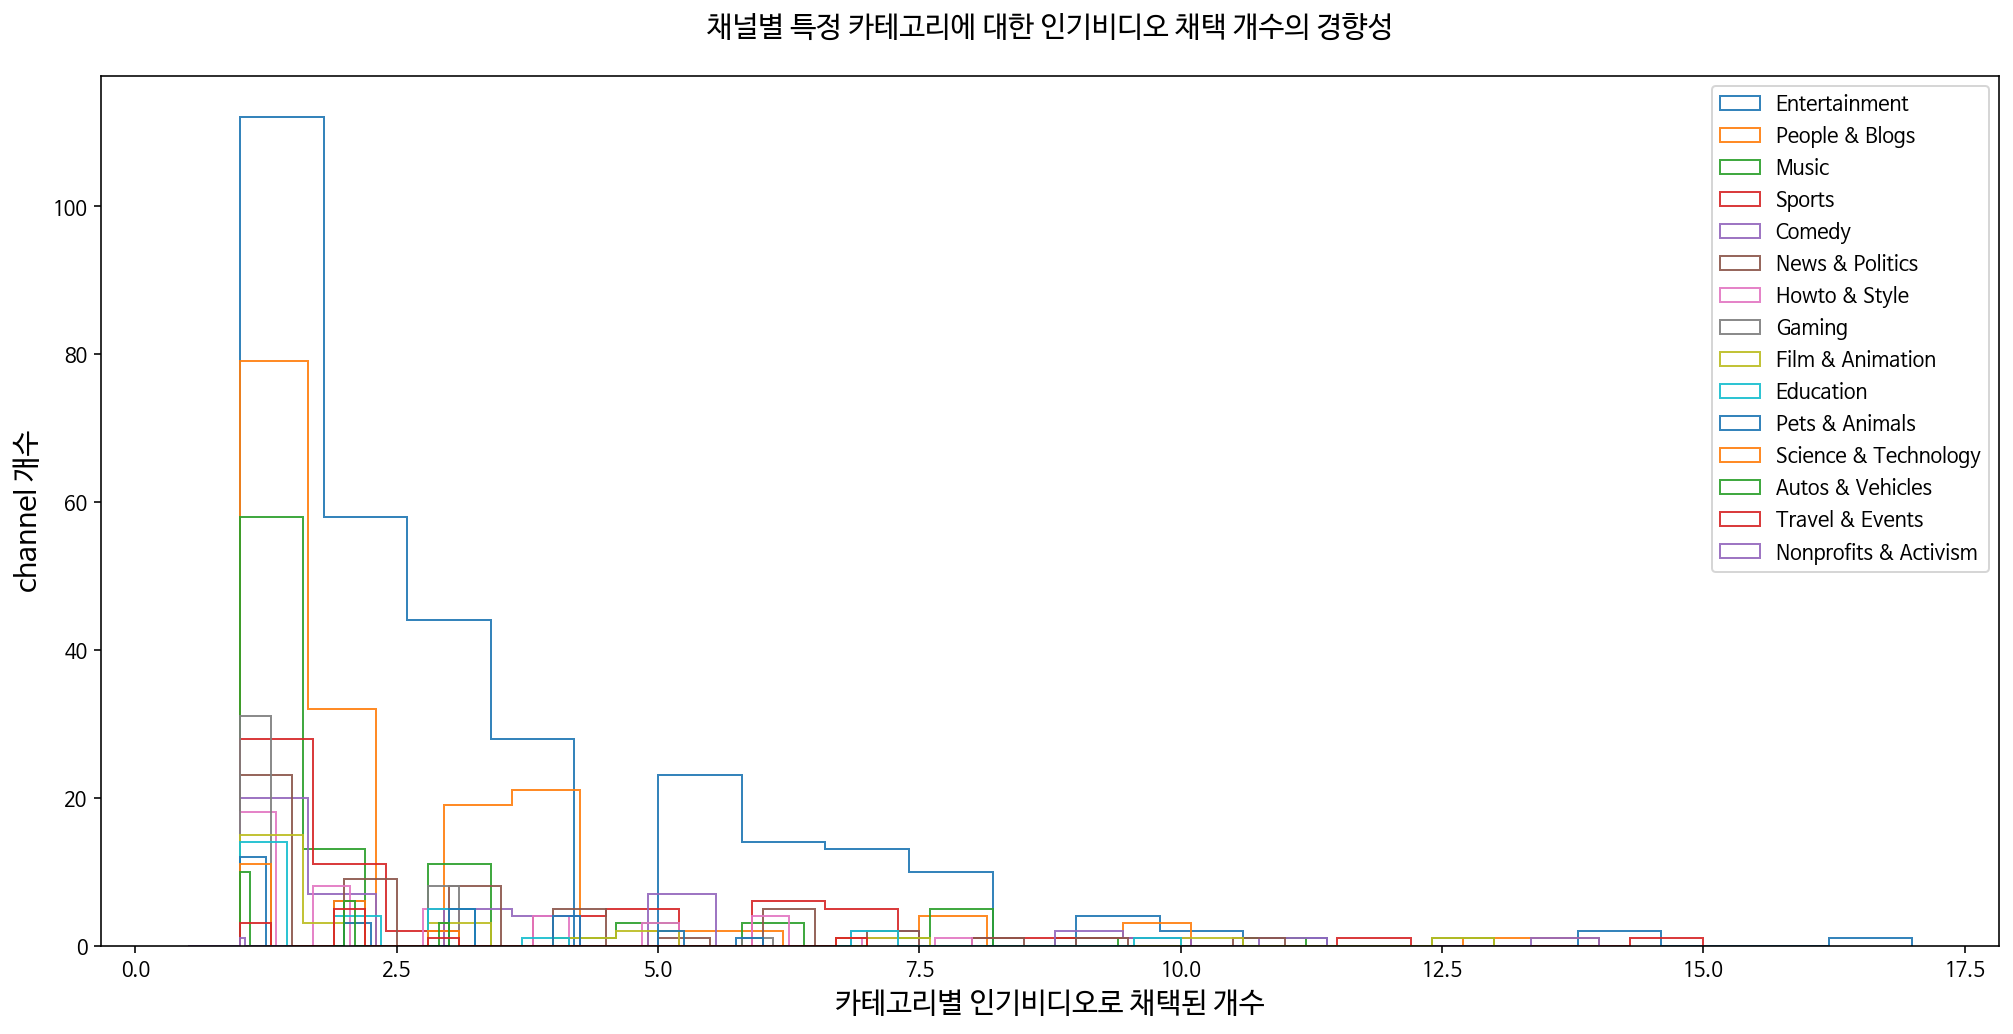

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(17,8))

for i in range(len(category_df)):
    plt.hist(category_df[i]['video_count'], bins=20, alpha = 0.9, histtype='step', label=category[i])

plt.xlabel(f"카테고리별 인기비디오로 채택된 개수",fontsize ='x-large');
plt.ylabel('channel 개수',fontsize ='x-large');
plt.title(f"채널별 특정 카테고리에 대한 인기비디오 채택 개수의 경향성", pad=20,fontsize ='x-large');
plt.legend() # 범례표시

plt.show();

위에서 설명한 바와 같이, 

모든 카테고리에서 한 카테고리에서 대부분 한 채널당 5개 이내의 영상이 인기영상으로 채택된 경우가 많은 것을 알 수 있습니다. 

* 그렇다면 이 채널들의 동영상 총 제작개수는 몇개일까요? 

### 인기비디오로 채택된 채널들의 전체 비디오 개수(카테고리별로 나누어 살펴보기)

인기비디오에 채택된 채널들이 제작한 전체 영상 개수에 대해 알아봅시다.

전체 비디오 개수와 관련된 컬럼은 on_channel_total_videos, off_channel_total_videos입니다.

- on_channel_total_videos : 인기 동영상에서 처음 기록된 채널의 비디오 개수
- off_channel_total_videos : 인기 동영상에서 사라지기 전 기록된 채널의 비디오 개수

인기비디오에 채택된 채널들의 영상개수에 대해 알아보는 것이므로, on_channel_total_videos을 기준으로 하겠습니다.

In [ ]:
df.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object')

In [ ]:
df.on_channel_total_videos.groupby([df.category_name, df.channel_id]).mean()

category_name     channel_id
Autos & Vehicles  CH-IBt8        1927.000000
                  CH2xkO7          97.500000
                  CH5f97D         551.500000
                  CHDpnvN         132.000000
                  CHH5U89       11488.500000
                                    ...     
Travel & Events   CHPDdt9         511.500000
                  CHPll9Z         358.000000
                  CHa0aTy         190.000000
                  CHlRNDV         180.142857
                  CHsLoTw        2795.000000
Name: on_channel_total_videos, Length: 970, dtype: float64

In [ ]:
# 이후에 category list를 활용해 변수로 쓰기 위함.
category_df = category.copy()

In [ ]:
# category = Entertainment만 추출(954row) -> channel_id에 중복값이 있는지 확인
df[df['category_name']==category[0]]['channel_id'].duplicated().sum()

642

Entertainment 카테고리에 인기비디오로 선정된 channel_id에는 642개의 중복값이 있습니다.

즉, Entertainment 인기비디오로 채택된 channel은 총 312개이며, 한 채널당 여러개의 영상이 인기비디오로 채택되었을 것입니다. 

on_channel_total_videos 컬럼은 각 비디오가 인기비디오로 채택된 시점에서 해당 채널의 총 비디오 개수를 측정한 것이므로, channel_id의 중복값에 대한 처리가 필요합니다. 

예를 들어, 아래에서 볼 수 있듯이, 17개의 영상이 인기비디오로 선정된 CHQ2O-i 채널의 경우,  'ViN5I'의 제작 당시에는 비디오 개수가 310개였으나, 'VW73A' 제작 당시의 비디오 개수는 417개입니다. 

In [ ]:
Entertainment_df = df[df['category_name']==category[0]]
Entertainment_df[Entertainment_df['channel_id'].isin(['CHQ2O-i'])][['channel_id', 'video_id','published_date','on_trending_date', 'on_channel_total_videos']].sort_values('on_channel_total_videos')

,channel_id,video_id,published_date,on_trending_date,on_channel_total_videos
1912,CHQ2O-i,ViN5I,2021-04-16,2021-04-18,310
2453,CHQ2O-i,Vv_pz,2021-04-27,2021-04-29,320
675,CHQ2O-i,VEldQ,2021-04-27,2021-04-29,320
2309,CHQ2O-i,VrvQg,2021-04-30,2021-05-02,327
1001,CHQ2O-i,VML9E,2021-05-02,2021-05-03,328
1030,CHQ2O-i,VMwA0,2021-05-02,2021-05-03,328
618,CHQ2O-i,VDEuV,2021-05-07,2021-05-09,334
892,CHQ2O-i,VJbtQ,2021-05-07,2021-05-09,334
2165,CHQ2O-i,VoK7L,2021-05-07,2021-05-09,334
2123,CHQ2O-i,VnSBp,2021-05-14,2021-05-16,344



그렇다면 Entertainment 카테고리에서 해당 채널의 비디오개수를 측정할 때는 무엇을 기준으로 해야할까요?

현재 풀고자 하는 task는 채널별 비디오 개수가 인기동영상 기준(시청자 호응도)과 어떤 연관성이 있는지이므로, 각 채널별로 비디오 개수의 평균값을 구해서 비교하도록 하겠습니다. 최소값이나 최대값보다 평균값이 객관적인 지표일 것 같습니다. 

In [ ]:
a = round(Entertainment_df[Entertainment_df['channel_id'].isin(['CHQ2O-i'])]['on_channel_total_videos'].mean())
print(f"Entertainment의 인기비디오로 채택된 CHQ2O-i채널의 비디오보유량은 평균 {a}개 입니다.")

Entertainment의 인기비디오로 채택된 CHQ2O-i채널의 비디오보유량은 평균 345개 입니다.


이제 Entertainment 카테고리에 속한 모든 채널들의 비디오 평균 보유량을 알아봅시다.

In [ ]:
category

['Entertainment',
 'People & Blogs',
 'Music',
 'Sports',
 'Comedy',
 'News & Politics',
 'Howto & Style',
 'Gaming',
 'Film & Animation',
 'Education',
 'Pets & Animals',
 'Science & Technology',
 'Autos & Vehicles',
 'Travel & Events',
 'Nonprofits & Activism']

In [ ]:
category_df[0] = df[df['category_name'] == category[0]].groupby(df['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')
category_df[0]['channel_videos_mean'] = category_df[0]['channel_videos_mean'].astype(int)

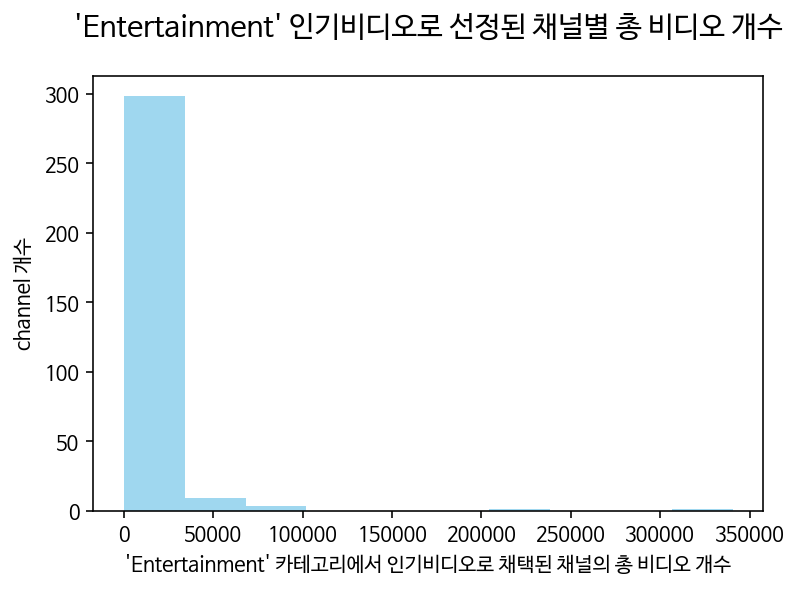

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(category_df[0]['channel_videos_mean'], color = 'skyblue', alpha = 0.8)
plt.xlabel(f"'{category[0]}' 카테고리에서 인기비디오로 채택된 채널의 총 비디오 개수");
plt.ylabel('channel 개수');
plt.title(f"'{category[0]}' 인기비디오로 선정된 채널별 총 비디오 개수", pad=20,fontsize ='x-large');
# plt.grid(True)
plt.show();

이제 각 카테고리별로 채널의 비디오 총보유량을 구해보겠습니다. 

In [ ]:
# 모든 채널의 평균 보유량 구하기
for i in range(len(category)):
    category_df[i] = df[df['category_name'] == category[i]].groupby(df['channel_id']).mean()['on_channel_total_videos']\
    .reset_index().rename(columns = {'on_channel_total_videos':'channel_videos_mean'}).sort_values('channel_videos_mean')

    # 소수점을 int로 형변환
    category_df[i]['channel_videos_mean'] = category_df[i]['channel_videos_mean'].astype(int)

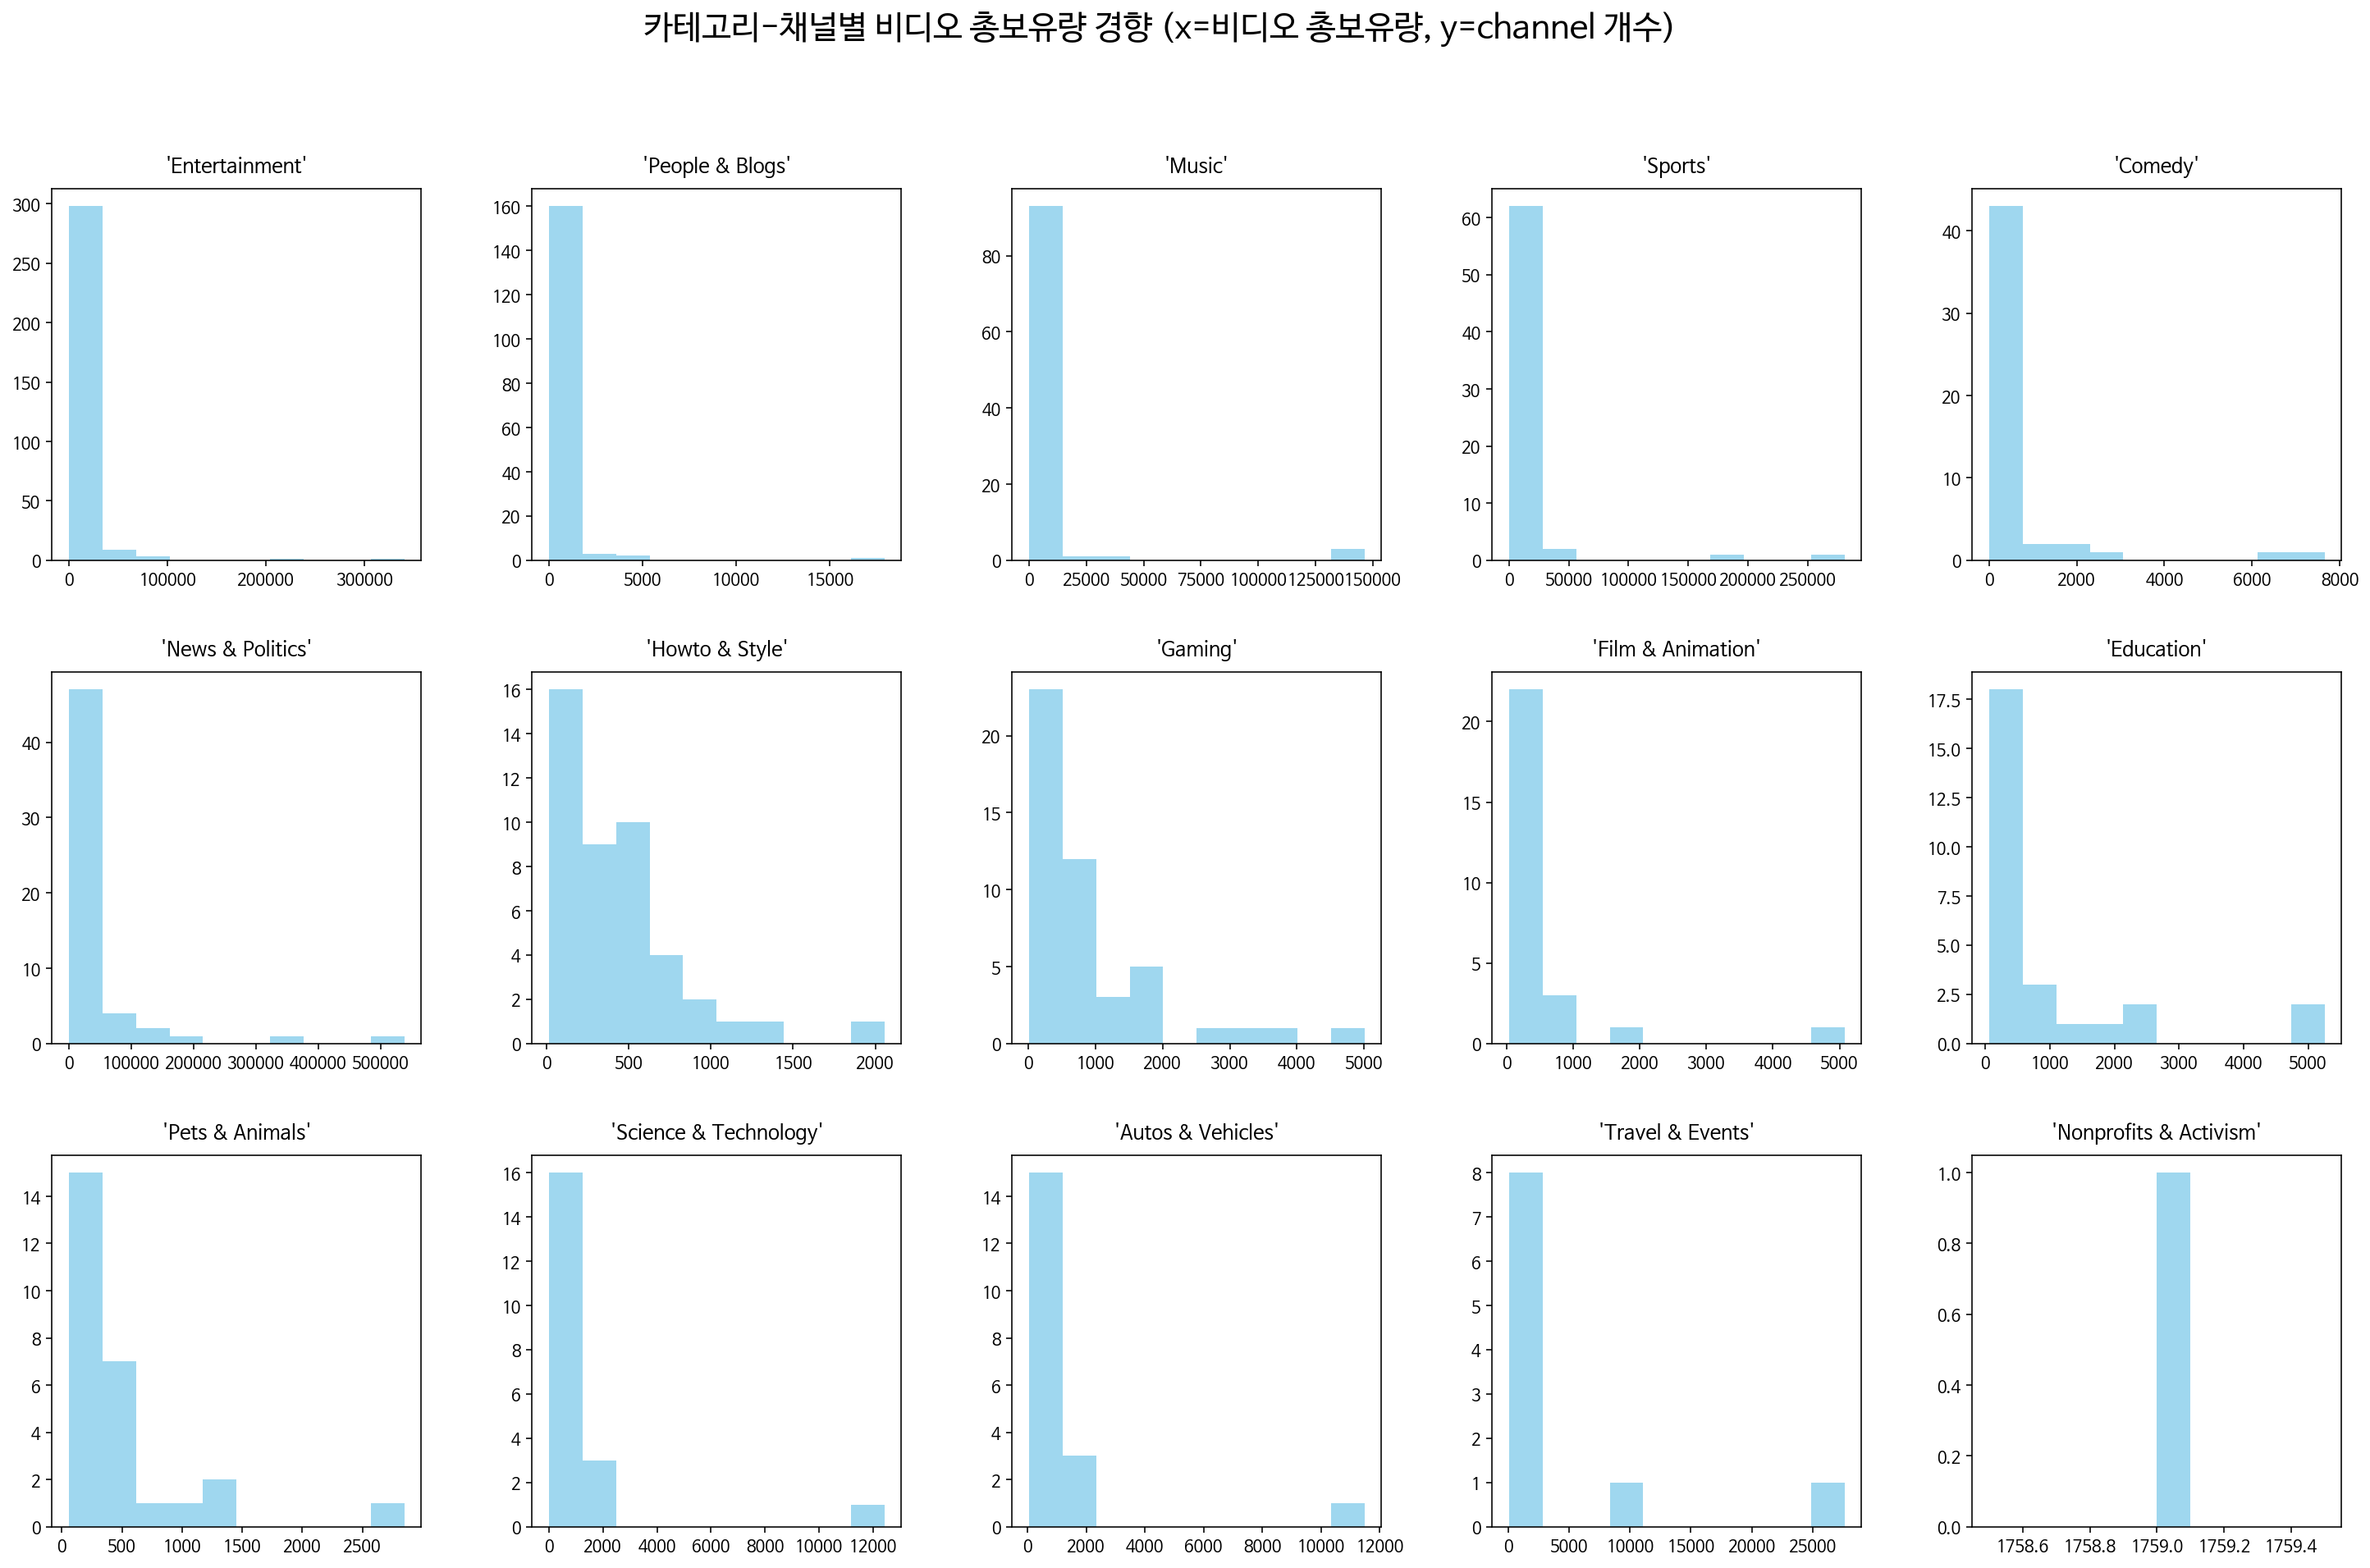

In [ ]:
# subplots 생성
f, axes = plt.subplots(3, 5)

# 격자 크기 설정
f.set_size_inches((25, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# figure 전체 제목
f.suptitle('카테고리-채널별 비디오 총보유량 경향 (x=비디오 총보유량, y=channel 개수)', fontsize = 20)


i=0
for j in range(3):
    for k in range(5):
        axes[j, k].hist(category_df[i]['channel_videos_mean'], color = 'skyblue', alpha = 0.8)
        axes[j, k].set_title(f"'{category[i]}'", fontsize = 12, pad=10)
        i+=1

plt.show()

이번에는 15개의 카테고리를 한 눈에 비교할 수 있도록 swarmplot과 boxplot을 이용하여 

카테고리별 채널의 총 비디오 개수와 분위수를 시각화 해봅니다.

In [ ]:
# 데이터프레임에 ['category_name'] 열 추가
for i in range(len(category)):
    category_df[i]['category_name'] = category[i]

In [ ]:
# 카테고리별로, 각 채널이 가진 비디오개수의 평균을 구한 뒤 한 데이터프레임으로 concat
for i in range(len(category)):
    if i == 0:
        category_df_concat = category_df[i]
    else:
        category_df_concat = pd.concat([category_df_concat, category_df[i]])

In [ ]:
# 샘플 10개를 뽑아보기
print(category_df_concat.shape)
category_df_concat.sample(n=10, random_state=1)

(970, 3)


,channel_id,channel_videos_mean,category_name
39,CHeFUGS,3682,News & Politics
57,CHpjOmw,7315,Sports
25,CHd4Fmc,135,Howto & Style
69,CHQWylD,54,People & Blogs
10,CH3WZlO,569,Music
240,CHkjXq1,65,Entertainment
103,CHKdfNL,264,Entertainment
8,CH8d0Zg,7559,News & Politics
10,CHBUNoF,39,Gaming
21,CHRykAt,354,Comedy


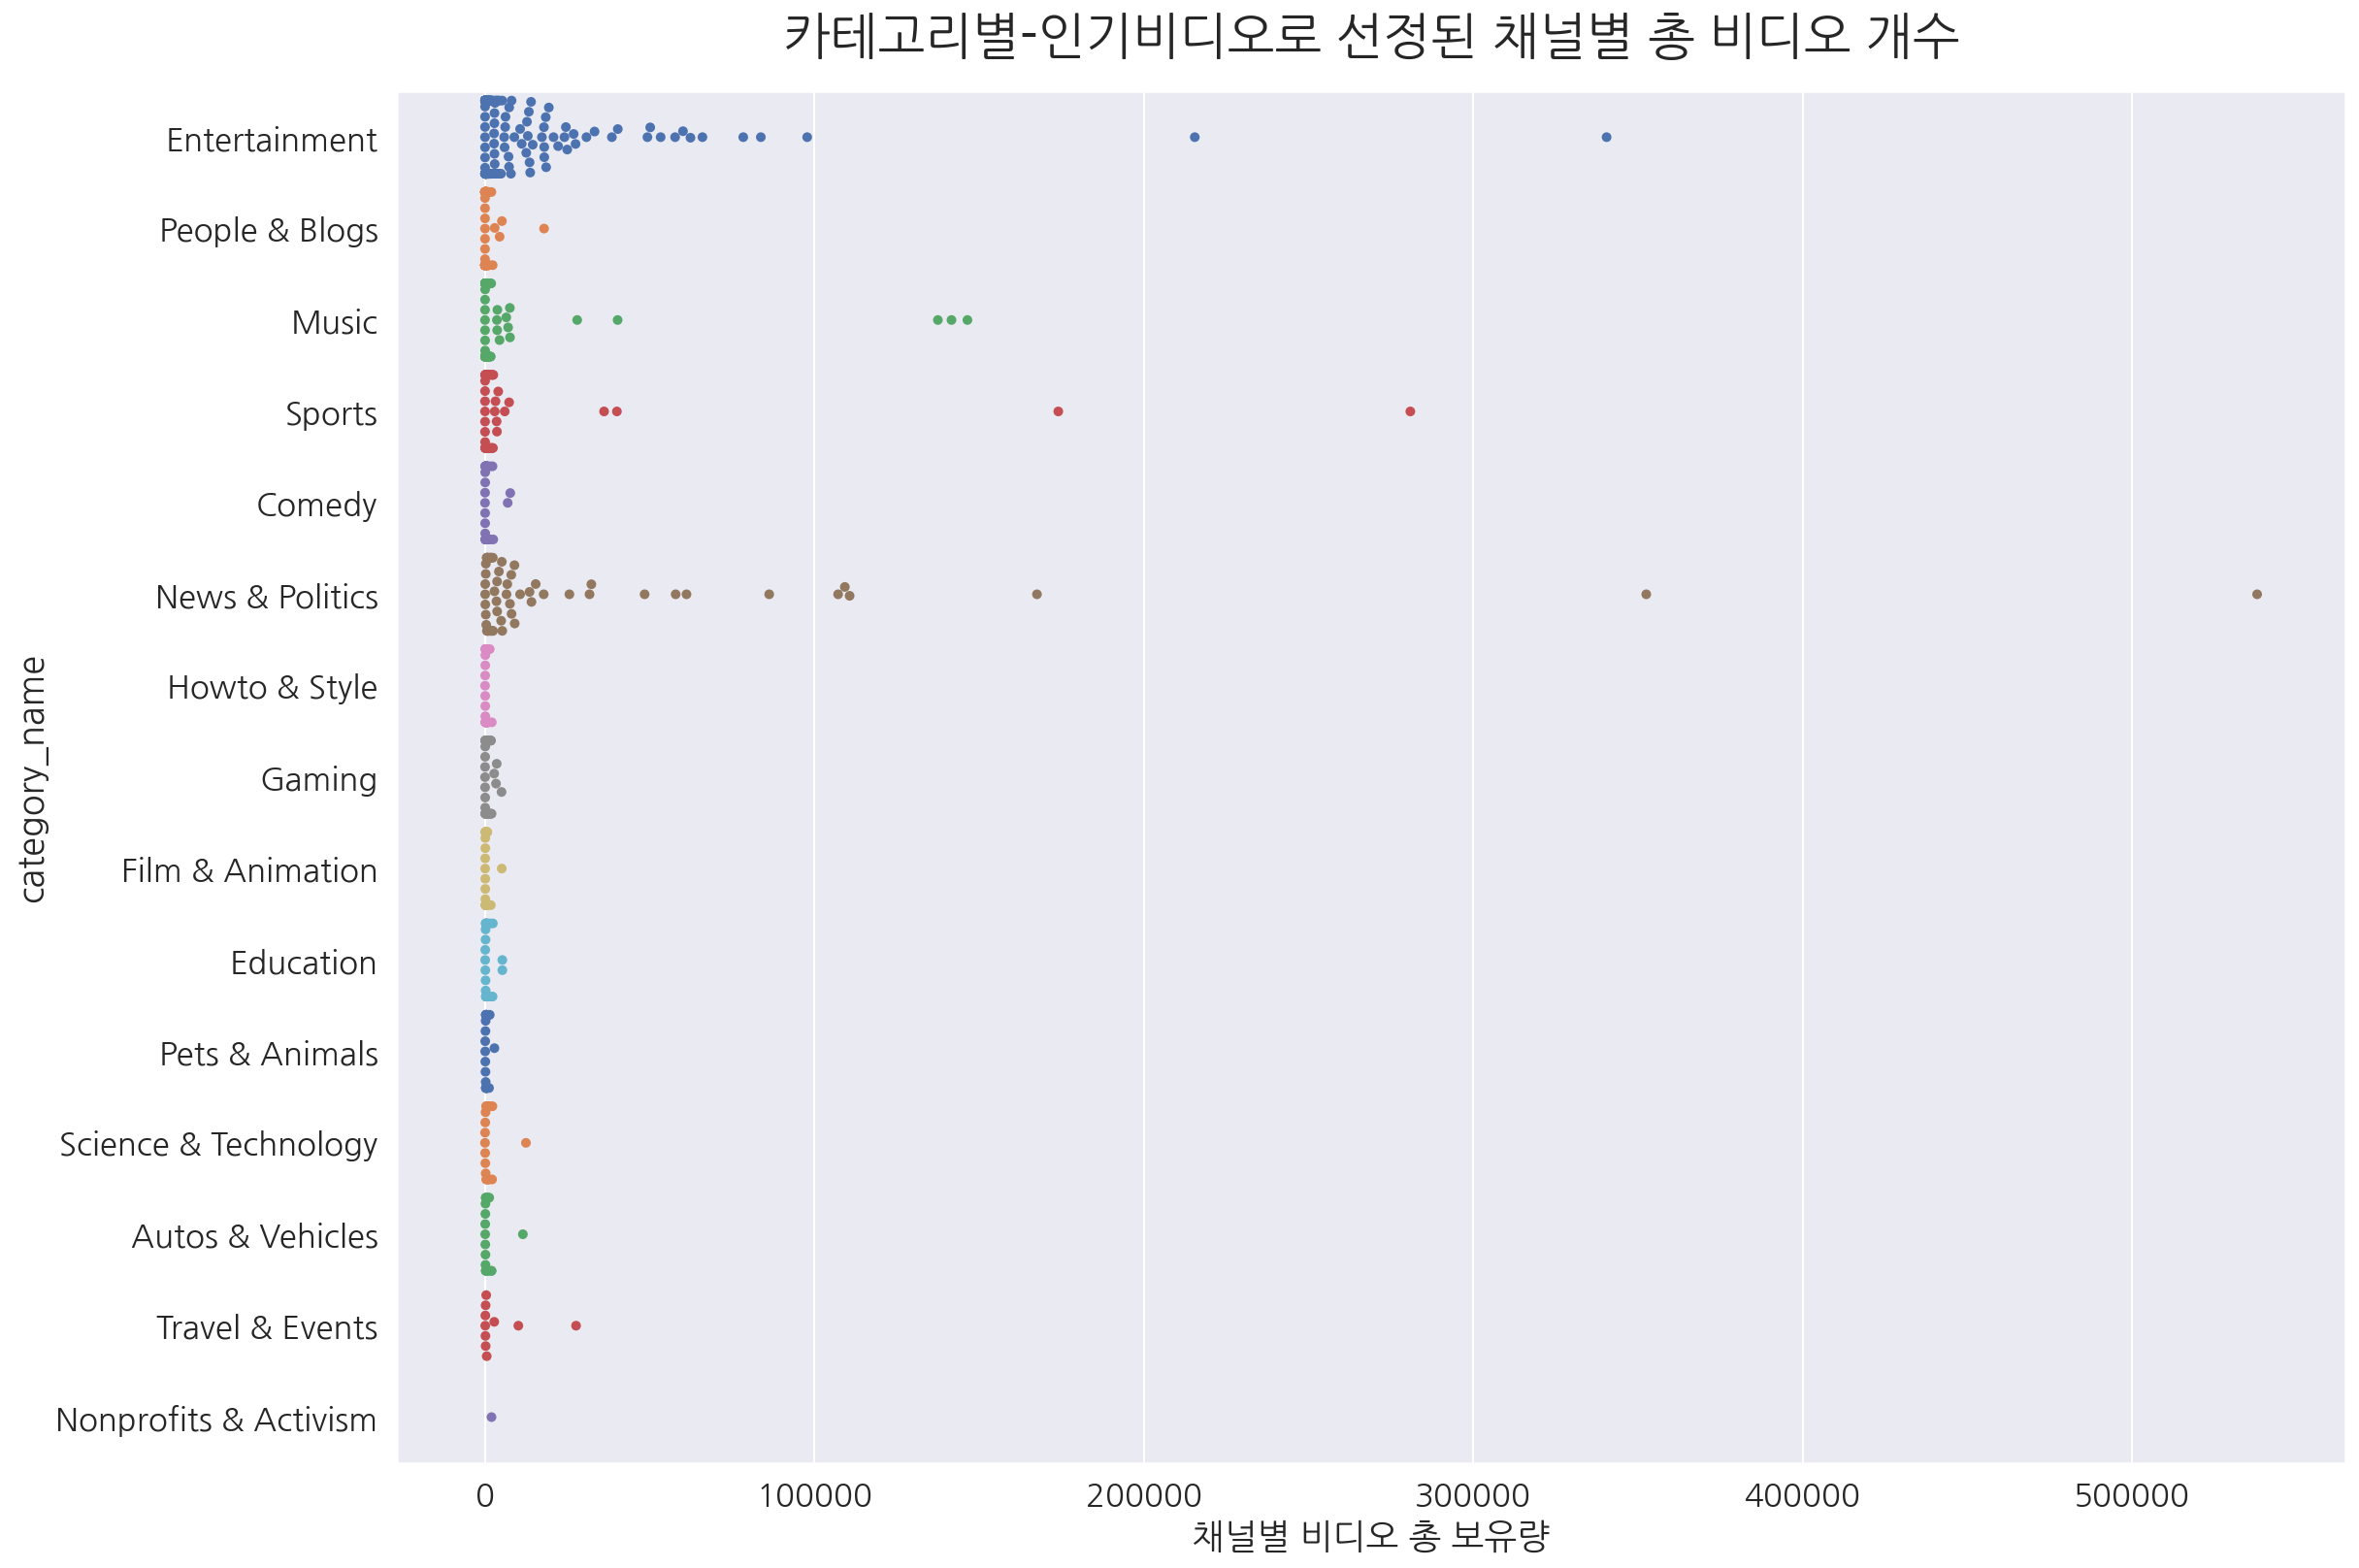

In [ ]:
import seaborn as sns

# 그래프사이즈와 글꼴사이즈
sns.set(rc = {'figure.figsize':(18,13)})
sns.set(font_scale=1.5)

# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

# 색상 설정(카테고리별 구분)
palette1 = sns.color_palette('deep', 10)

# 제목설정
plt.title("카테고리별-인기비디오로 선정된 채널별 총 비디오 개수",pad=20,fontsize ='x-large')

# swarmplot : 점이 겹치지 않는 범주형 산점도
sns.swarmplot(x="channel_videos_mean", y="category_name", data=category_df_concat,color="0.4", palette = palette1)
plt.xlabel('채널별 비디오 총 보유량');

plt.show()

아웃라이어를 제외하고, 좀 더 많은 분포가 되어있는 1~100,000 비디오 총 보유량 지점을 확대해 보겠습니다. 

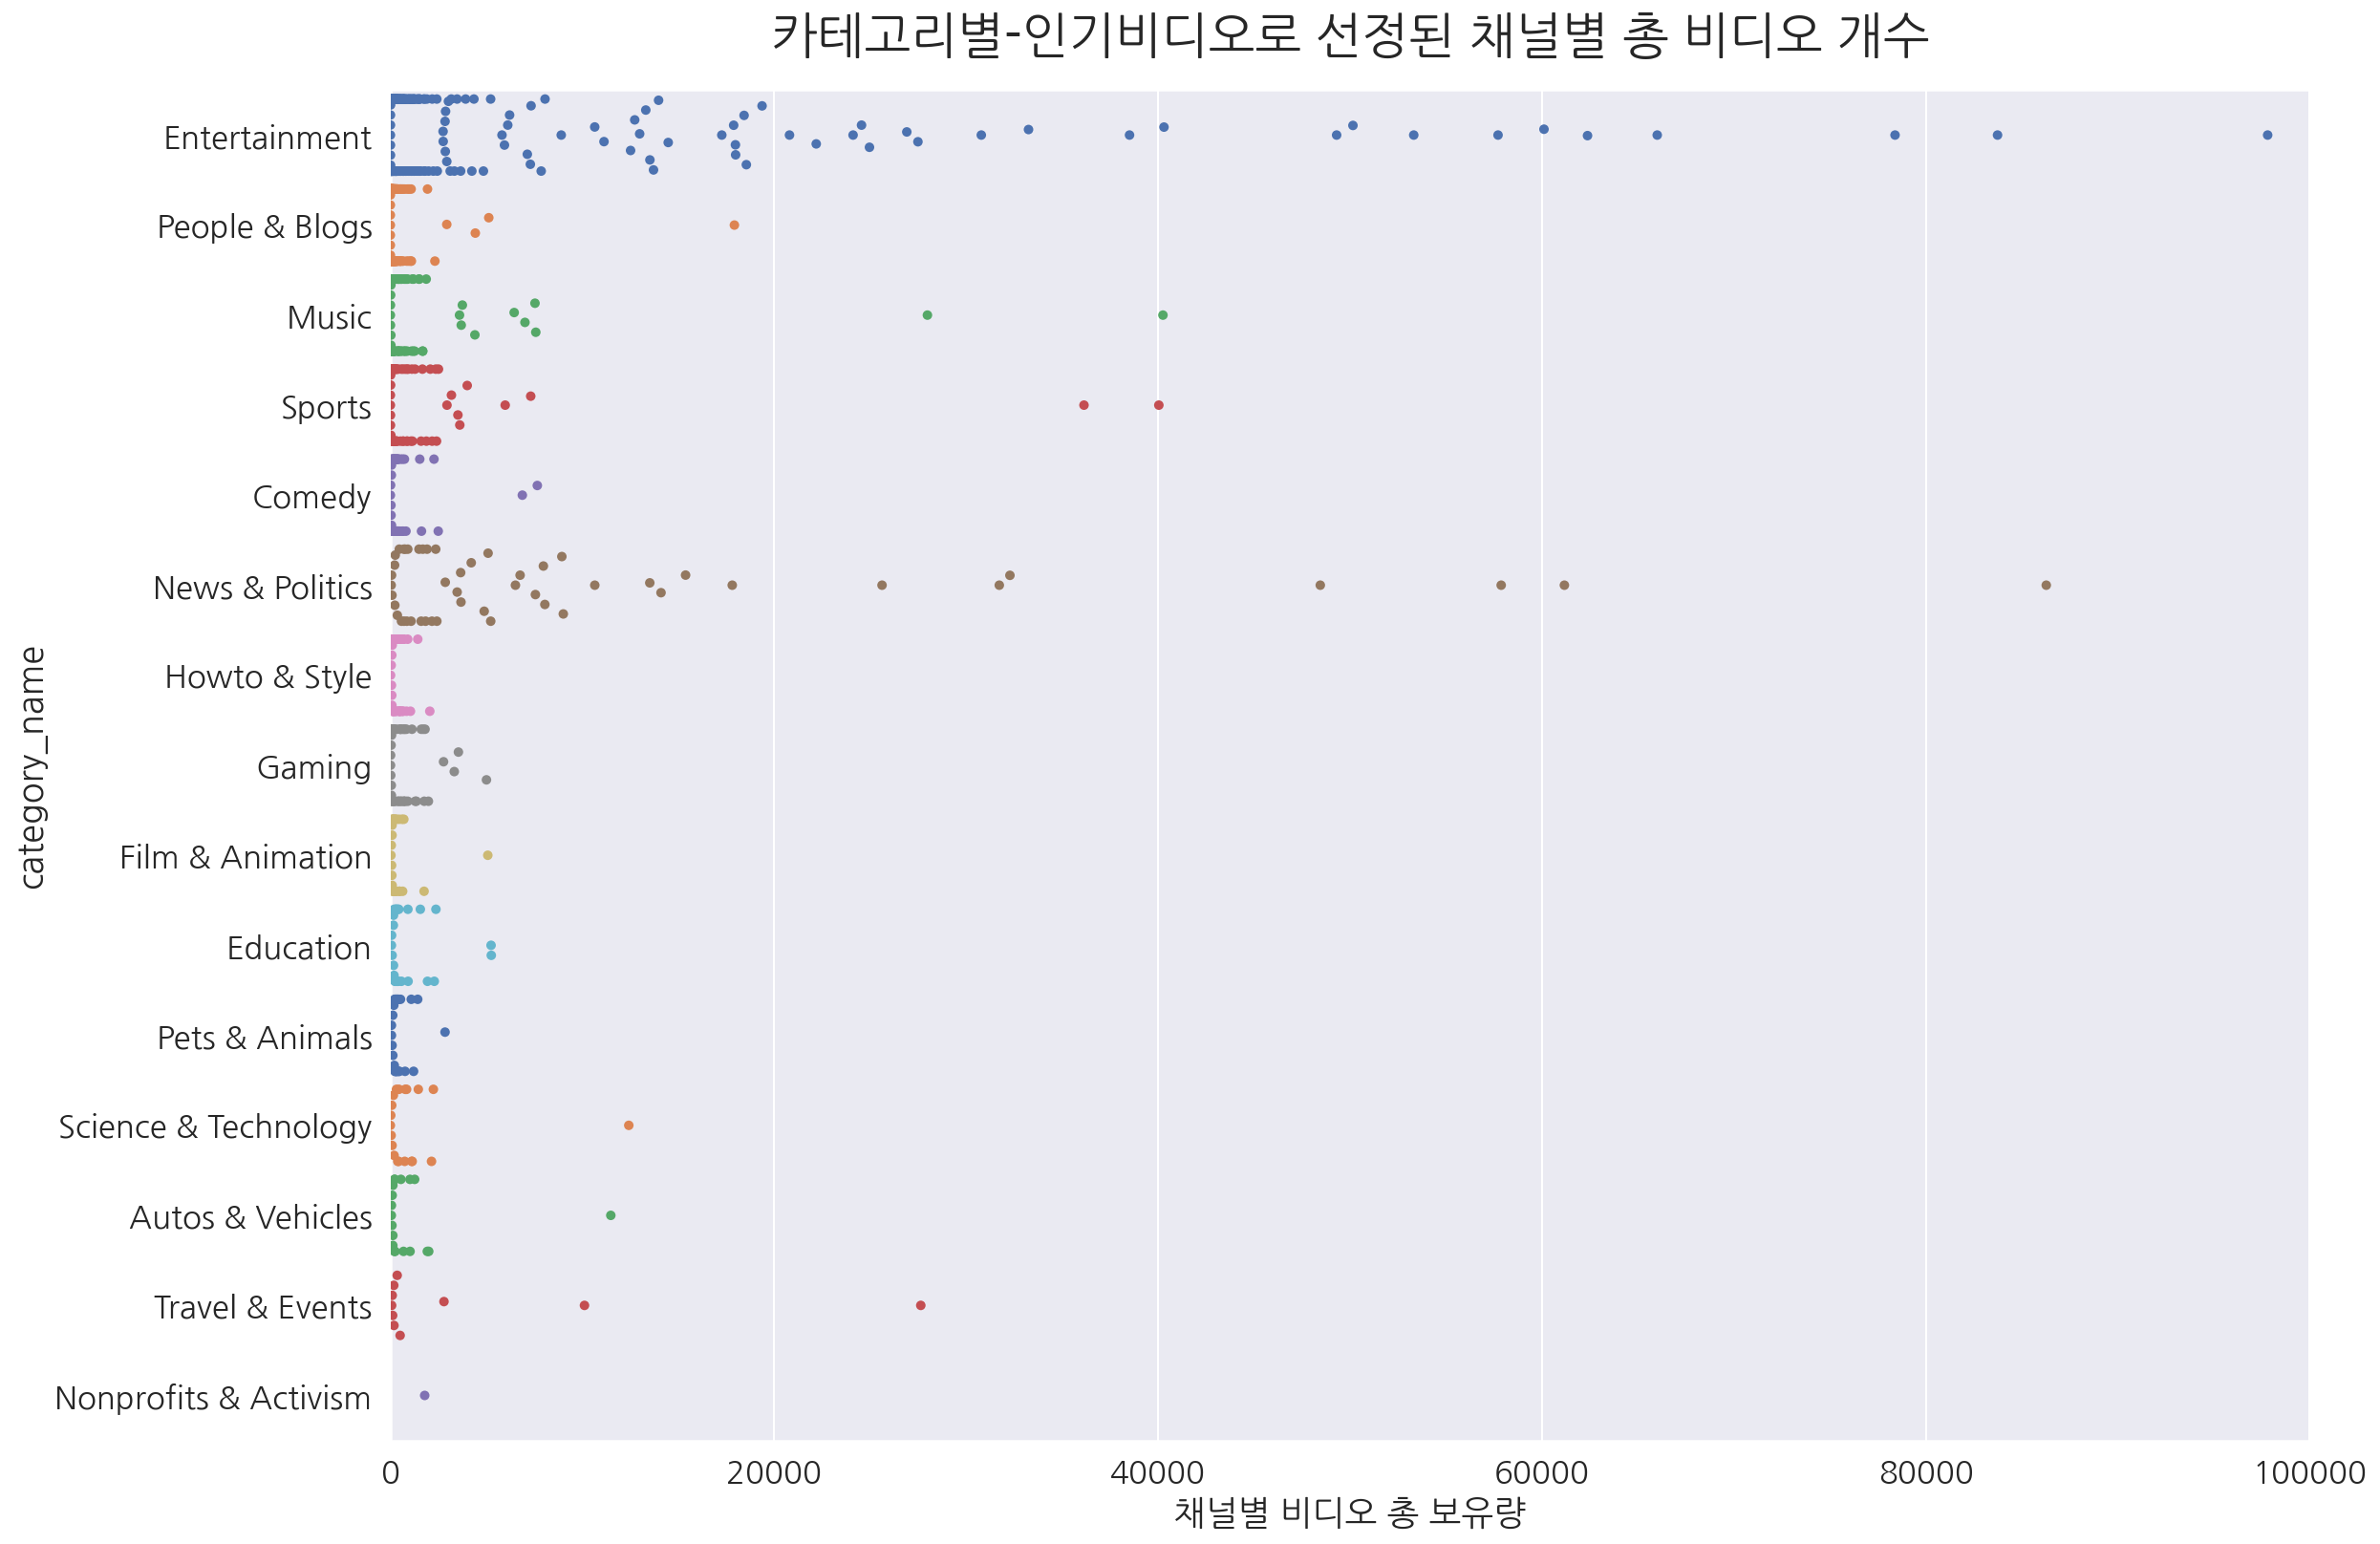

In [ ]:
import seaborn as sns

# 그래프사이즈와 글꼴사이즈
sns.set(rc = {'figure.figsize':(18,13)})
sns.set(font_scale=1.5)

# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

# 색상 설정(카테고리별 구분)
palette1 = sns.color_palette('deep', 10)

# 제목설정
plt.title("카테고리별-인기비디오로 선정된 채널별 총 비디오 개수",pad=20,fontsize ='x-large')

# swarmplot : 점이 겹치지 않는 범주형 산점도
sns.swarmplot(x="channel_videos_mean", y="category_name", data=category_df_concat,color="0.4", palette = palette1)
plt.xlabel('채널별 비디오 총 보유량');

plt.xlim([0, 100000])   # X축 범위의 설정
plt.show()

Entertainment와 News&Politics 카테고리의 채널 이외에는 비디오 총 보유량이 20,000개 이상 되지는 않습니다. 

X축의 범위를 20,000 까지 축소해 보겠습니다.

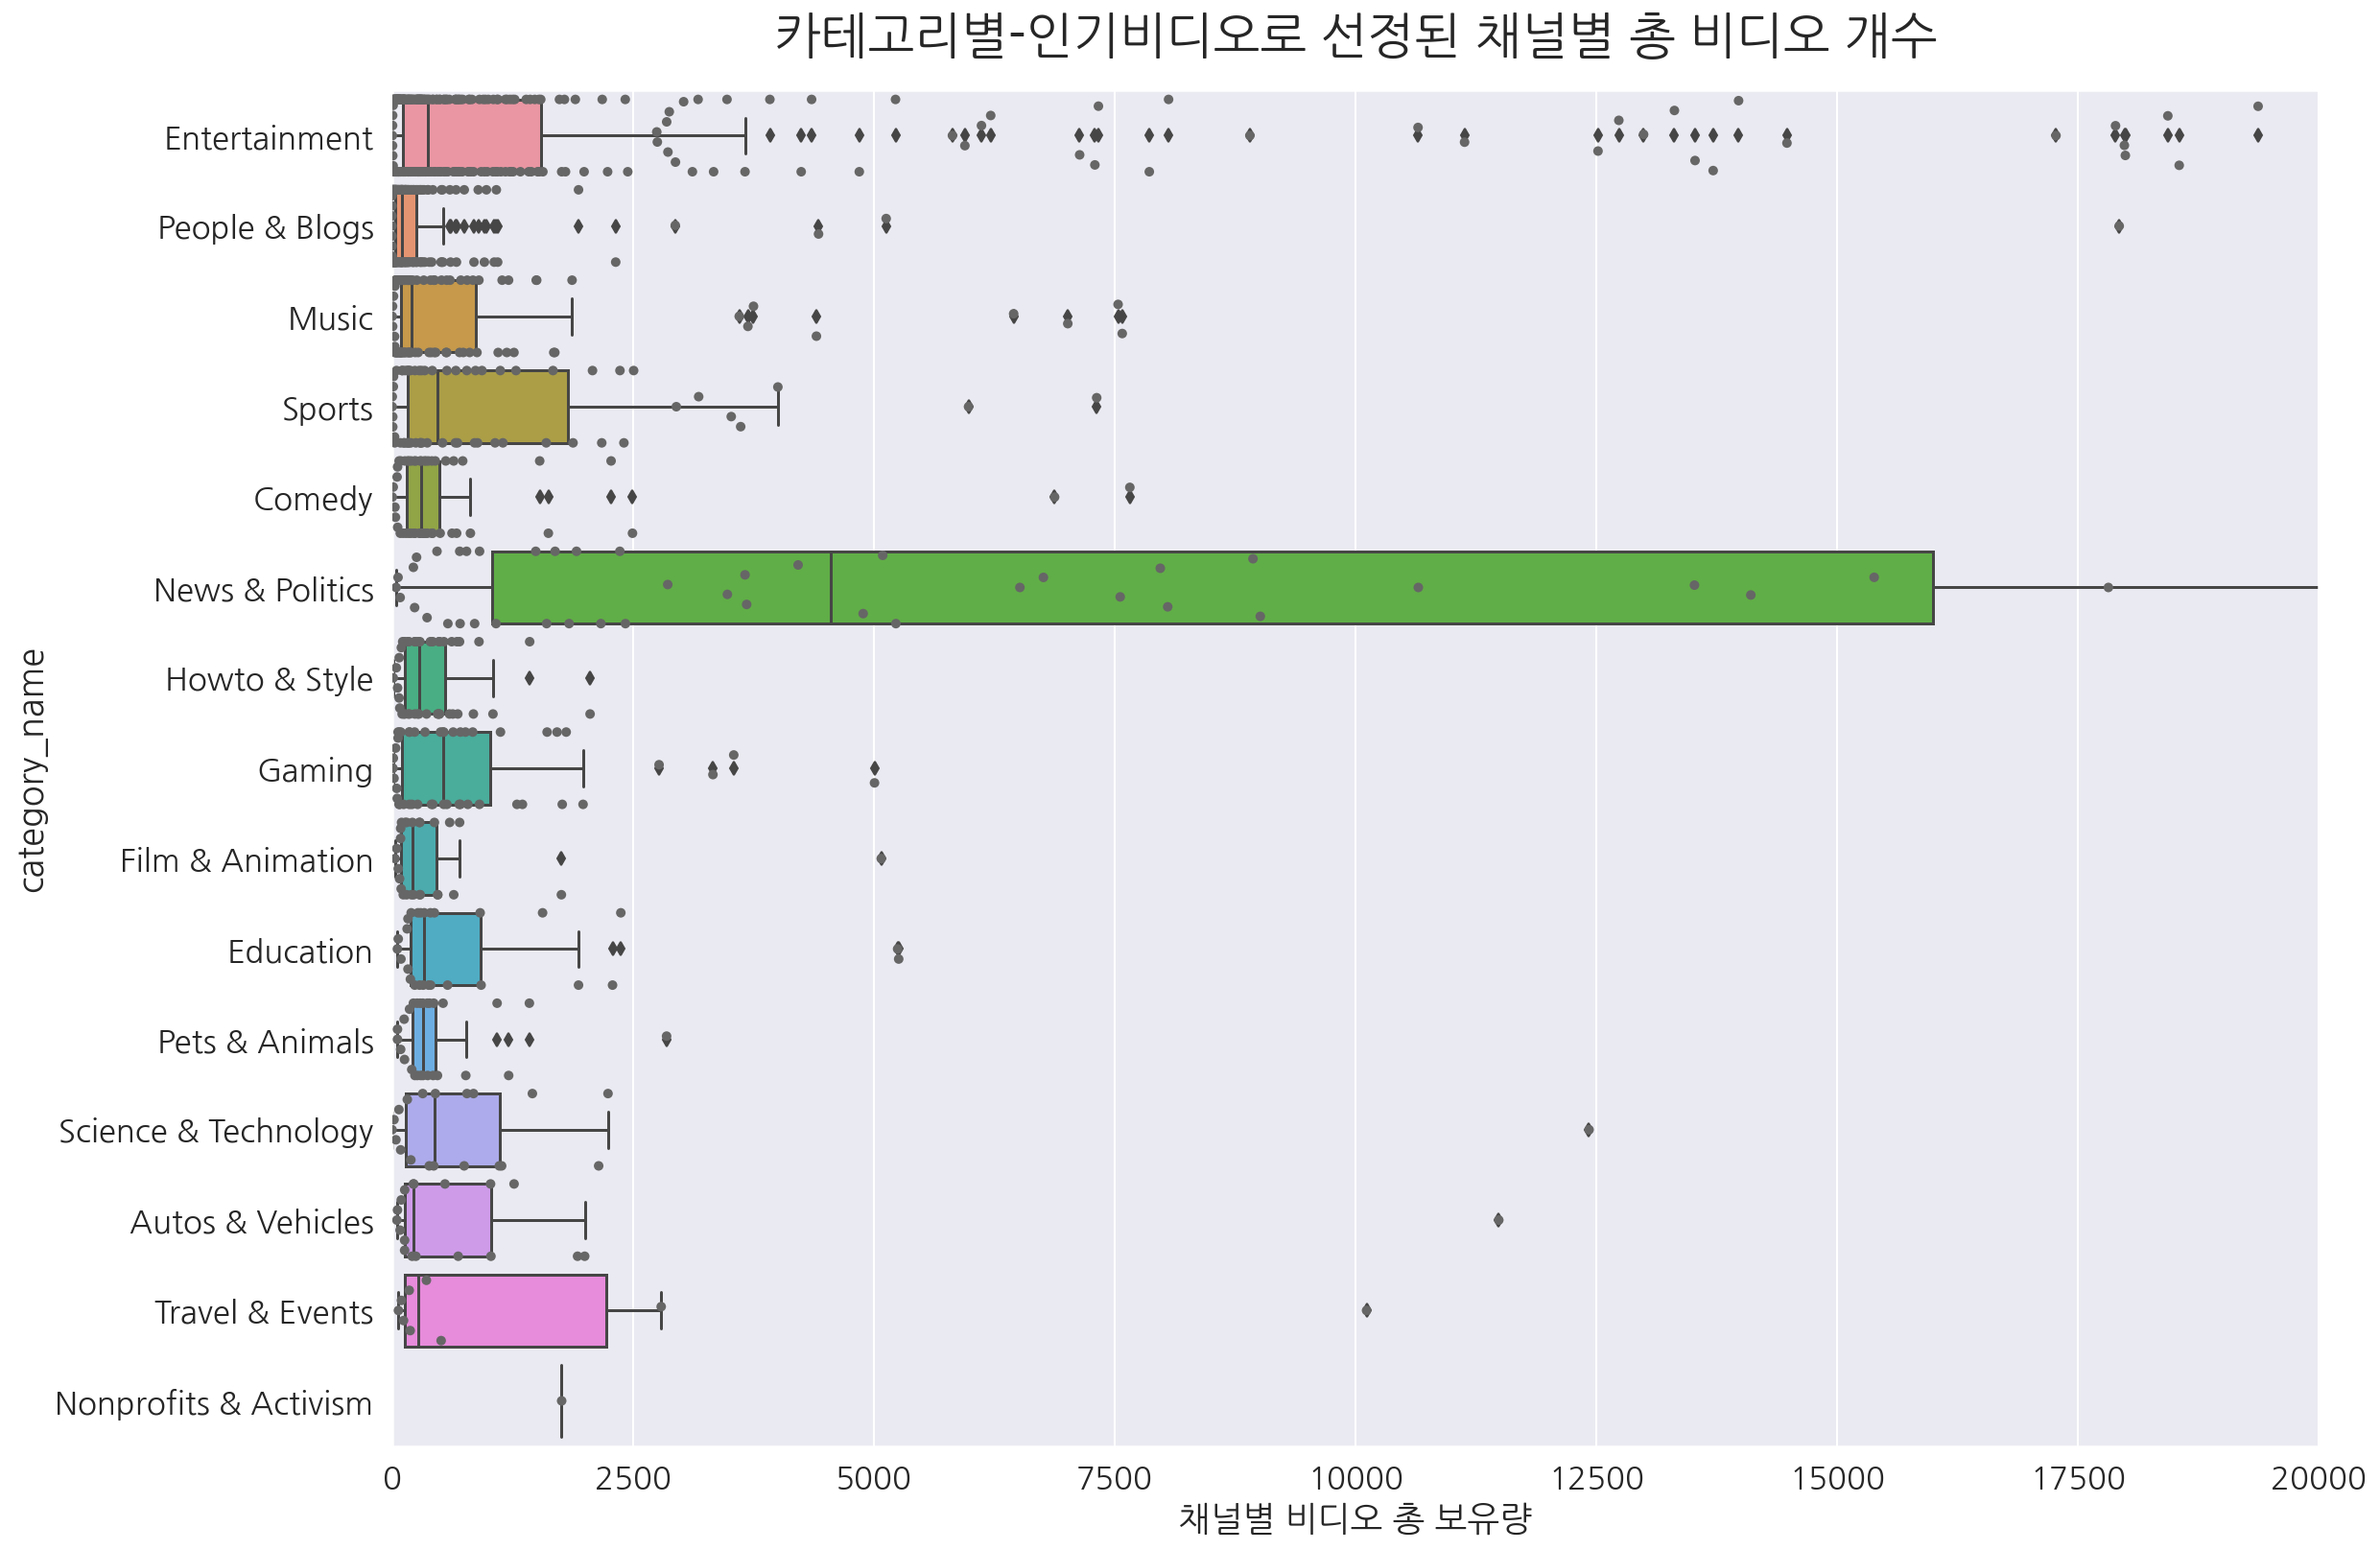

In [ ]:
import seaborn as sns

# 그래프사이즈와 글꼴사이즈
sns.set(rc = {'figure.figsize':(18,13)})
sns.set(font_scale=1.5)

# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'


# 제목설정
plt.title("카테고리별-인기비디오로 선정된 채널별 총 비디오 개수",pad=20,fontsize ='x-large')

# # boxplot : 범주와 관련된 분포를 표시. 사분위수와 아웃라이어 확인이 가능
sns.boxplot(x="channel_videos_mean", y="category_name", data=category_df_concat)
sns.swarmplot(x="channel_videos_mean", y="category_name", data=category_df_concat,color="0.4")
plt.xlabel('채널별 비디오 총 보유량');

plt.xlim([0, 20000])   # X축 범위의 설정
plt.show()

4분위를 표현가능한 boxplot까지 함께 표기해 보았습니다. News&Politics 카테고리를 제외하면 대부분 채널별 비디오 총보유량이 2500개 이하입니다. 

이 부분을 다시 확대해서 보겠습니다. 

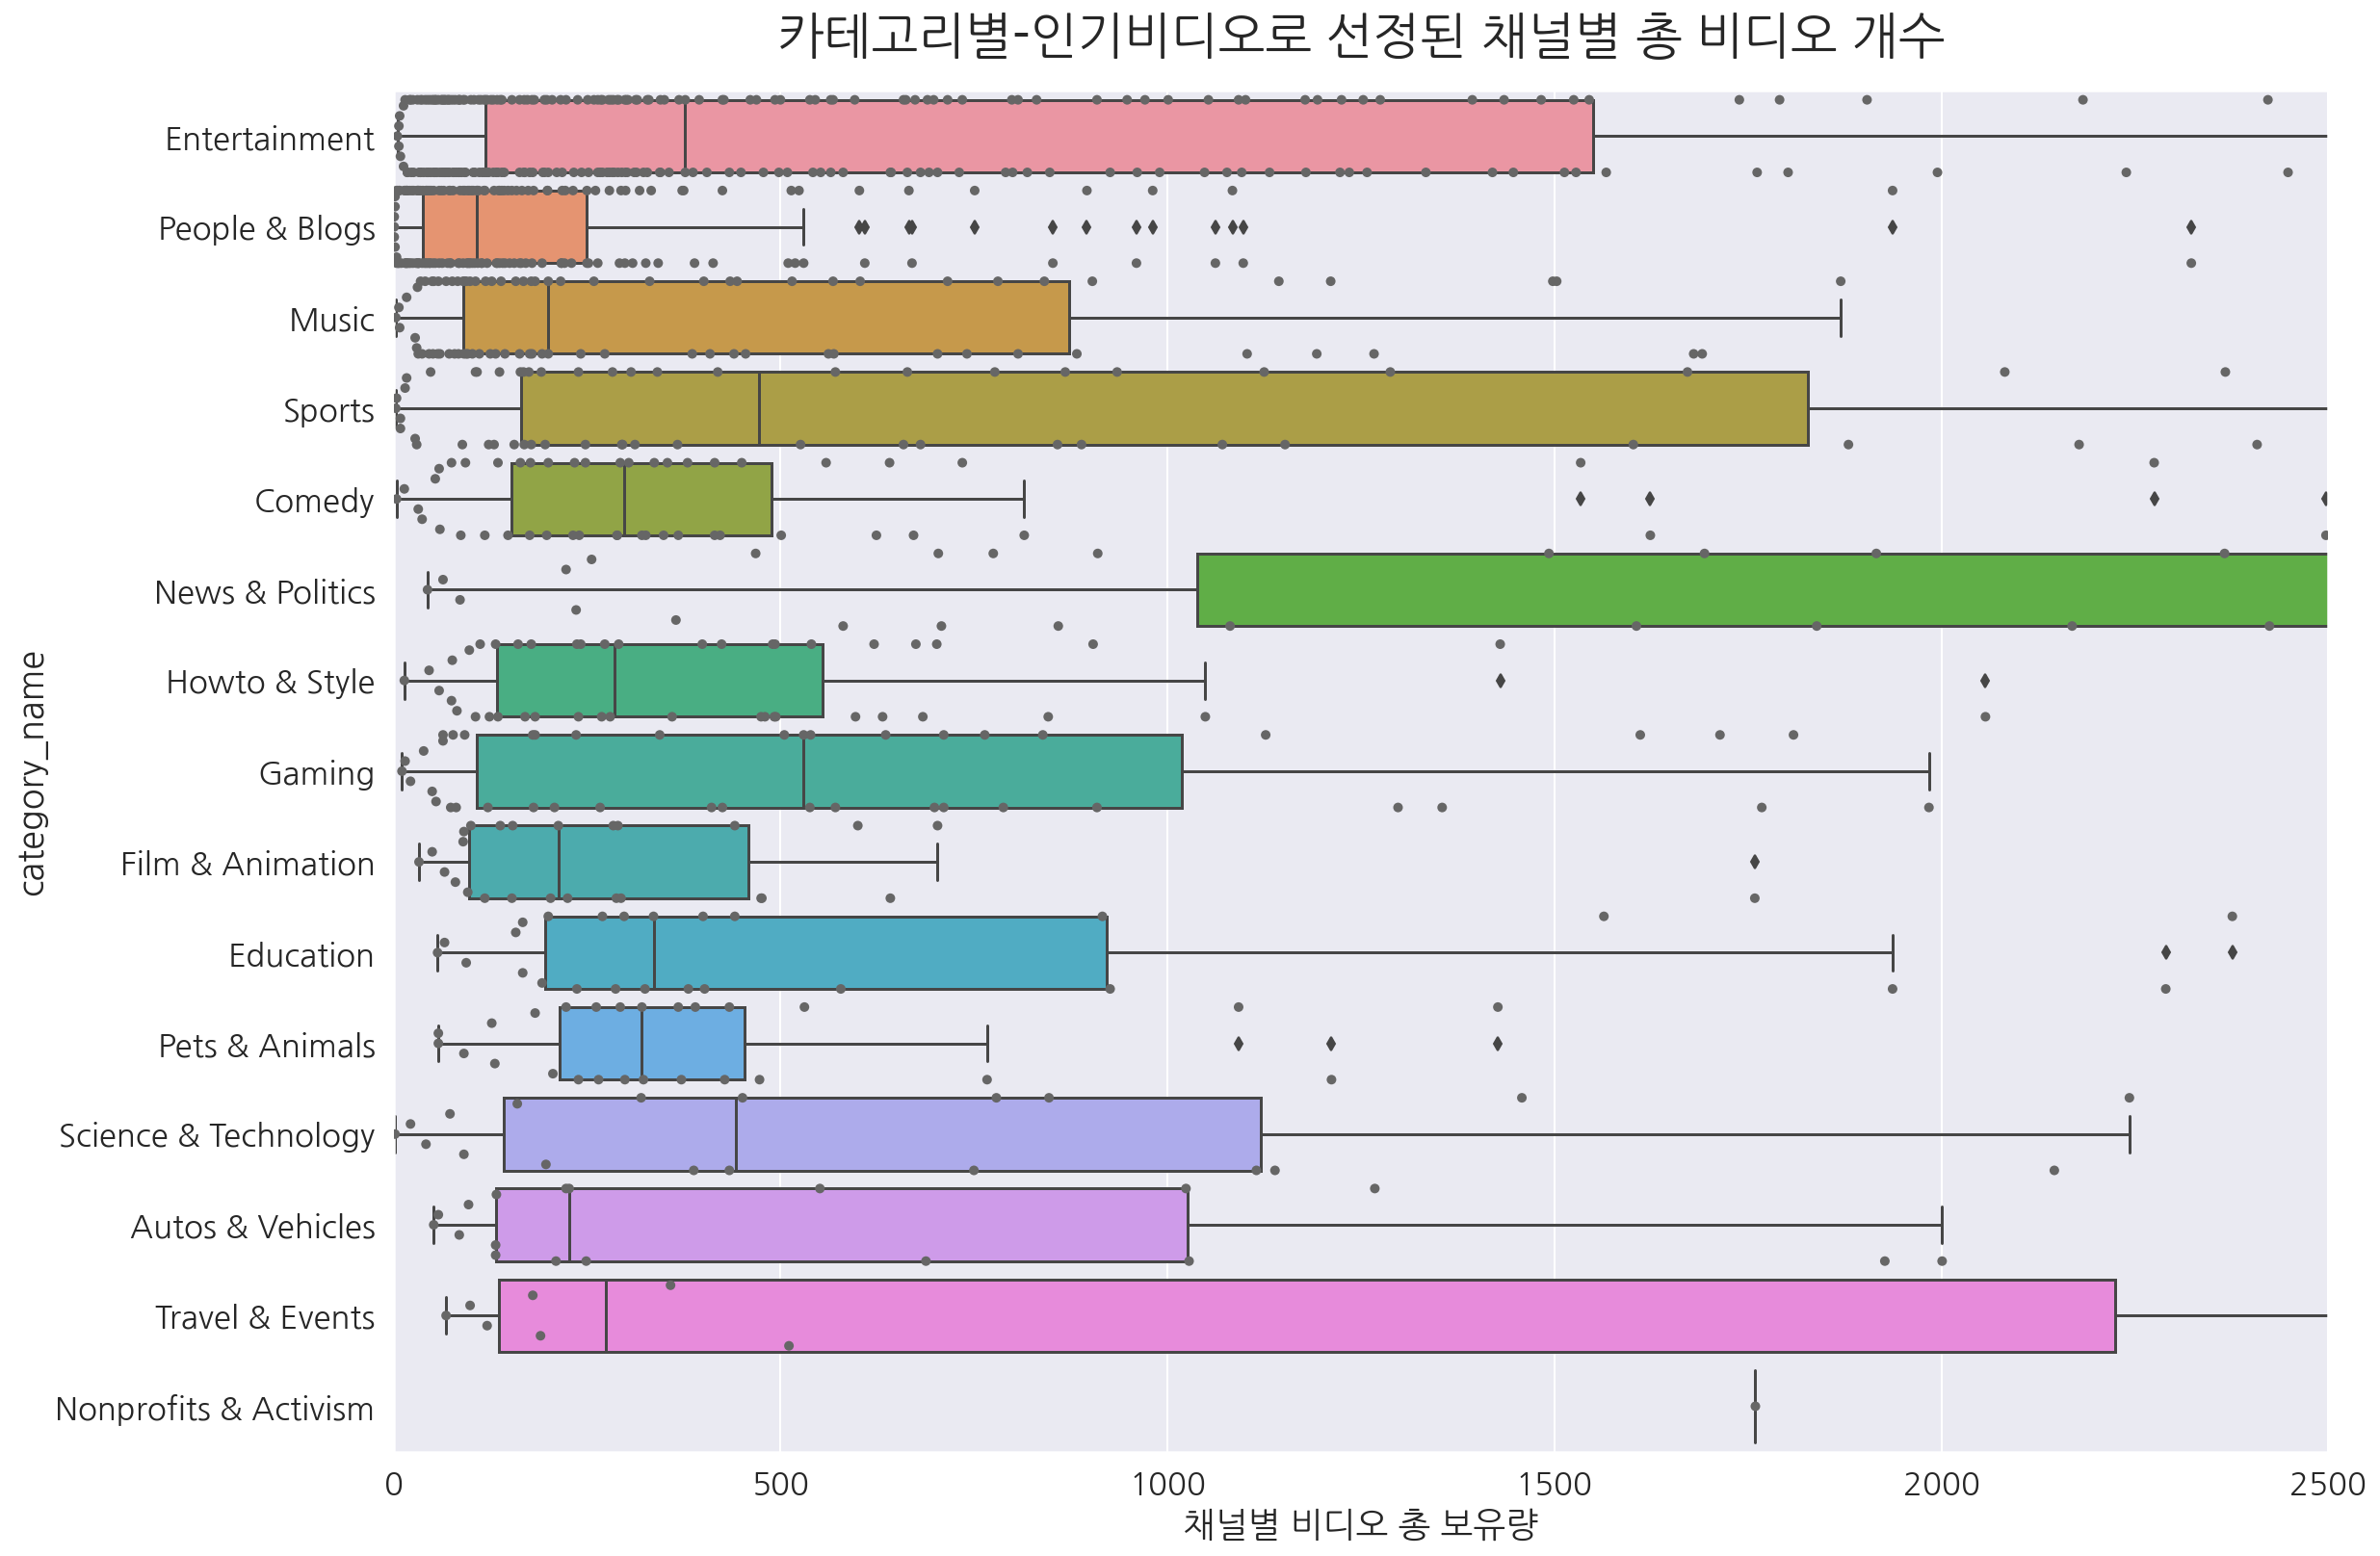

In [ ]:
import seaborn as sns

# 그래프사이즈와 글꼴사이즈
# sns.set(rc = {'figure.figsize':(18,13)})
fig, ax = plt.subplots(figsize=(18,13))

sns.set(font_scale=1.5)

# 한글깨짐 및 마이너스 오류 수정
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

# 색상 설정(카테고리별 구분)
palette1 = sns.color_palette('deep', 10)

# 제목설정
plt.title("카테고리별-인기비디오로 선정된 채널별 총 비디오 개수",pad=20,fontsize ='x-large')

# boxplot : 범주와 관련된 분포를 표시. 사분위수와 아웃라이어 확인이 가능
sns.boxplot(x="channel_videos_mean", y="category_name", data=category_df_concat)
sns.swarmplot(x="channel_videos_mean", y="category_name", data=category_df_concat,color="0.4")
plt.xlabel('채널별 비디오 총 보유량');

plt.xlim([0, 2500])   # X축 범위의 설정
plt.show()

카테고리별로 채널별 비디오 총보유량을 봤을 때, 

Entertainment와 News & Politics 카테고리에는 아웃리이어가 많은 편이고 채널별 비디오 보유량 수가 2500개 이상으로 매우 많은 경우가 많습니다.

그러나 이외의 카테고리에서는 대부분 2500개 이하의 보유량을 가진편이며, 중앙값으로는 대체로 300~400개 전후에 머무르고 있습니다.(아웃라이어 수가 많기때문에 평균값이 무의미)

시각화한 부분을 구체적인 수치로 좀 더 정확하게 아래와 같이 알아볼 수 있습니다. 



In [ ]:
category_df_concat

,channel_id,channel_videos_mean,category_name
117,CHNl-TU,5,Entertainment
32,CH4JAFO,7,Entertainment
79,CHF8W68,7,Entertainment
96,CHIY5oU,8,Entertainment
140,CHTmrCB,9,Entertainment
...,...,...,...
5,CHPDdt9,511,Travel & Events
9,CHsLoTw,2795,Travel & Events
3,CHFw4M1,10116,Travel & Events
2,CHFCtZJ,27639,Travel & Events


In [ ]:
# pivot_table로 wide한 형태의 데이터로 변환
wide = category_df_concat.pivot_table(index = 'channel_id', columns = 'category_name', values = 'channel_videos_mean')

In [ ]:
wide.describe(percentiles= [.10, .25, .5, .75, .90])

category_name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
count,19.000000,50.000000,27.000000,312.000000,27.000000,47.000000,44.000000,98.000000,56.000000,1.0,166.000000,27.000000,20.000000,66.000000,10.000000
mean,1135.421053,702.220000,947.185185,6498.544872,486.703704,835.510638,418.772727,5818.000000,34125.250000,1759.0,385.403614,497.185185,1254.100000,9028.454545,4207.700000
std,2581.663575,1450.807042,1406.967553,25932.437559,980.756726,1054.948811,393.154556,24827.792991,88788.054059,NaN,1506.157994,581.632784,2712.928945,40562.879809,8803.403762
min,52.000000,4.000000,57.000000,5.000000,33.000000,11.000000,14.000000,3.000000,44.000000,1759.0,1.000000,58.000000,2.000000,3.000000,68.000000
10%,79.600000,58.500000,132.400000,53.100000,74.400000,53.000000,77.800000,39.800000,310.500000,1759.0,15.000000,112.600000,40.000000,29.000000,95.900000
25%,132.000000,152.000000,196.000000,118.750000,98.000000,107.000000,134.250000,90.250000,1038.250000,1759.0,38.500000,214.500000,142.750000,165.000000,135.750000
50%,227.000000,298.500000,336.000000,377.000000,213.000000,530.000000,285.500000,200.000000,4553.500000,1759.0,108.000000,321.000000,442.500000,472.500000,274.000000
75%,1026.000000,488.250000,921.000000,1550.500000,458.000000,1018.000000,554.250000,872.500000,15991.750000,1759.0,250.000000,453.500000,1121.000000,1828.000000,2224.000000
90%,1941.800000,1543.000000,2324.400000,13950.600000,666.400000,1879.000000,802.800000,3948.900000,96740.000000,1759.0,605.500000,1140.000000,2155.700000,3813.000000,11868.300000
max,11488.000000,7659.000000,5260.000000,340523.000000,5079.000000,5009.000000,2057.000000,146459.000000,538034.000000,1759.0,17927.000000,2851.000000,12425.000000,280940.000000,27639.000000


인기비디오로 채택된 채널들을 카테고리별로 나누어 총 비디오 개수를 고려해 보았습니다. 

최소 개수는 Comedy 카테고리에서 4개의 영상만을 제작한 채널도 인기비디오로 채택될 수 있었고, 최대로는 News&politics 카테고리에서 538034개의 영상을 제작한 채널이 채택되었습니다. 

채널별 제작비디오의 총 개수가 인기비디오 선정과 큰 연관이 있다고 보기는 어렵습니다.

그러나 카테고리별로 제 1사분위(Q1)값이 110내외, 중앙값이 300~400개 내외에 있다는 점을 고려했을 때, 

(즉, 인기비디오로 선정된 채널의 75% 가량이 약 110개 이상의 비디오를 제작함.) 

보다 안정적인 인기비디오 채택을 위해서 고려할 수 있는 채널별 총 비디오 개수는 약 100개 이상이라고 할 수 있습니다. 

